In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd

# Load the dataset
data_path = '/content/cleaned_data.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
df.head()


Year  Month  Day  Hour  Minute  Temperature  DHI  GHI  DNI  \
0  2022      1    1     0      30          5.4    0    0    0   
1  2022      1    1     1      30          5.4    0    0    0   
2  2022      1    1     2      30          5.3    0    0    0   
3  2022      1    1     3      30          5.1    0    0    0   
4  2022      1    1     4      30          4.8    0    0    0   

   Relative Humidity  Wind Speed  Wind Direction  Country  
0             100.00         3.8             261  Germany  
1              99.69         4.1             263  Germany  
2              99.45         4.5             264  Germany  
3              99.34         4.9             265  Germany  
4              99.27         5.3             266  Germany

In [ ]:
# here we Check the unique values in the 'Country' column
unique_countries = df['Country'].unique()
print(unique_countries)


['Germany' 'Japan' 'Spain' 'Turkey' 'USA']


**Generating Descriptive Statistics and Visualization of Climate Data by Country**

In [ ]:
import pandas as pd

# Read the data file
data = pd.read_csv('/content/cleaned_data.csv')

# Create a dataframe for the relevant columns
df = data[['Year','Month','Day','Hour','Temperature', 'DHI', 'GHI', 'DNI', 'Relative Humidity', 'Wind Speed', 'Wind Direction', 'Country']]

# Group the data by country and generate descriptive statistics for each group
grouped_data = df.groupby('Country').describe()

# Apply color coding to the statistics for each group
styled_data = grouped_data.style.background_gradient(cmap='rainbow')

# Display the styled data
styled_data


**Visualizing the Distribution of Temperature for each country  in the all year**

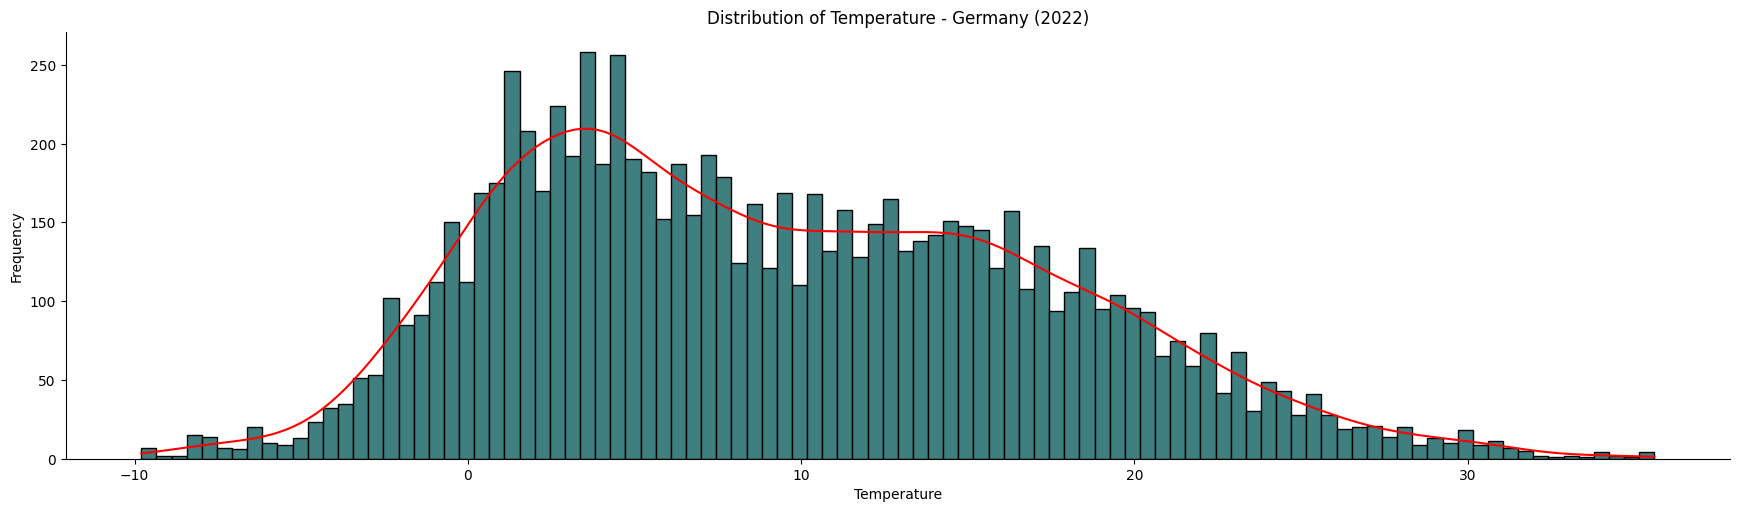

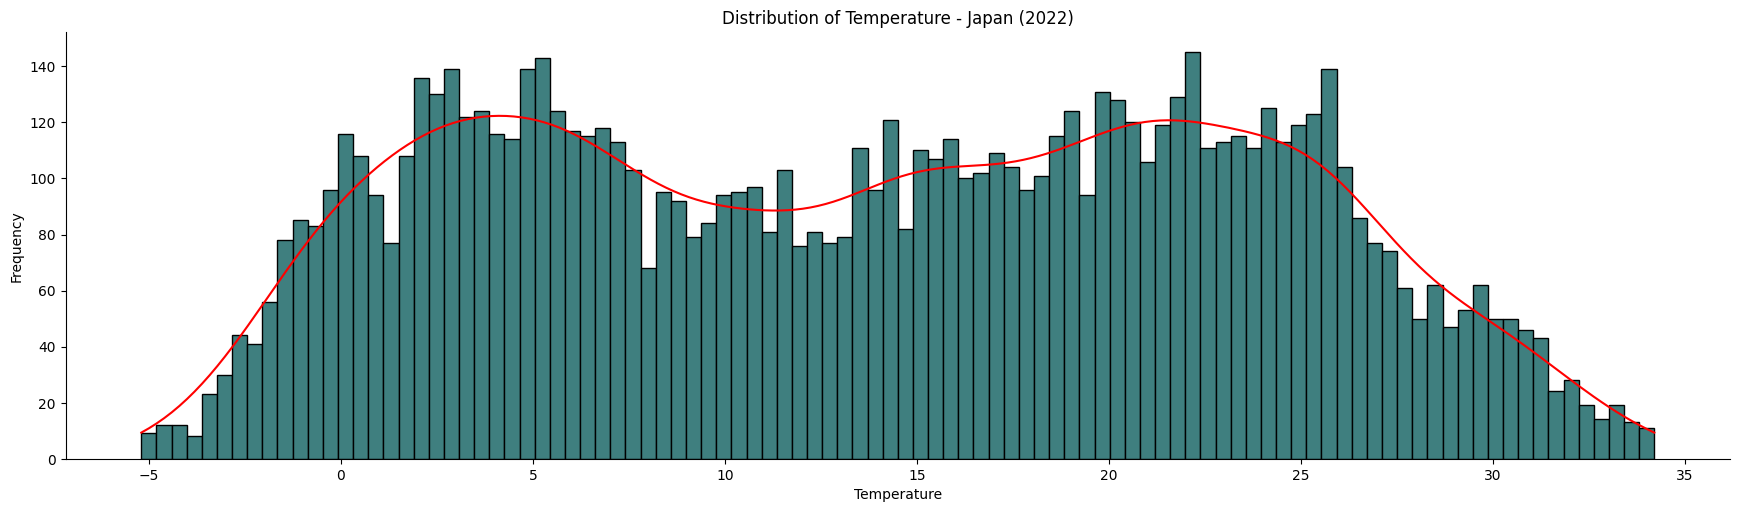

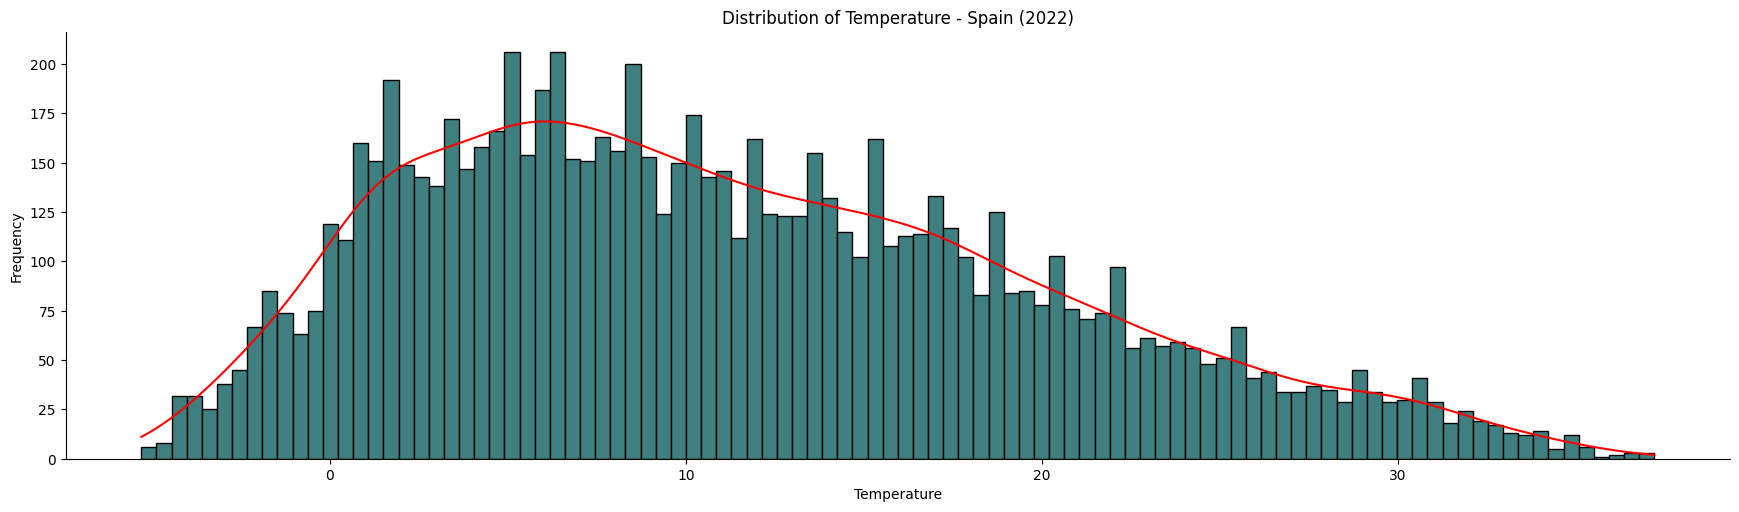

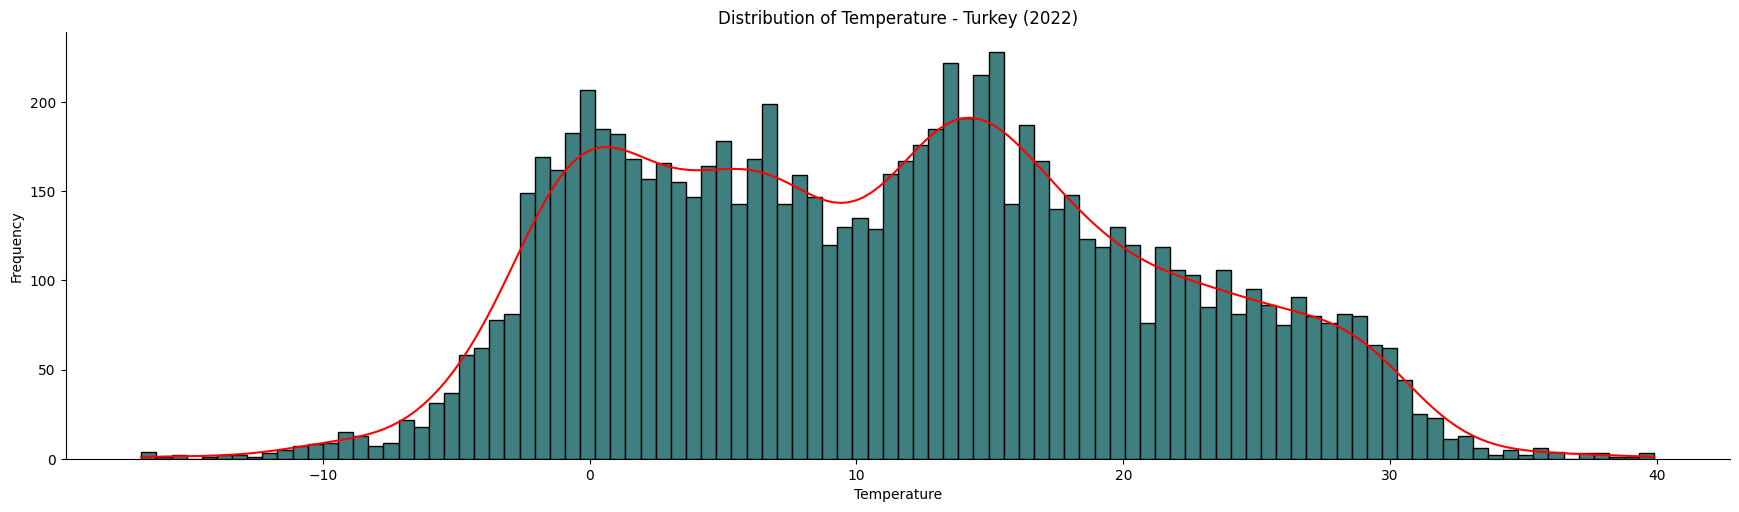

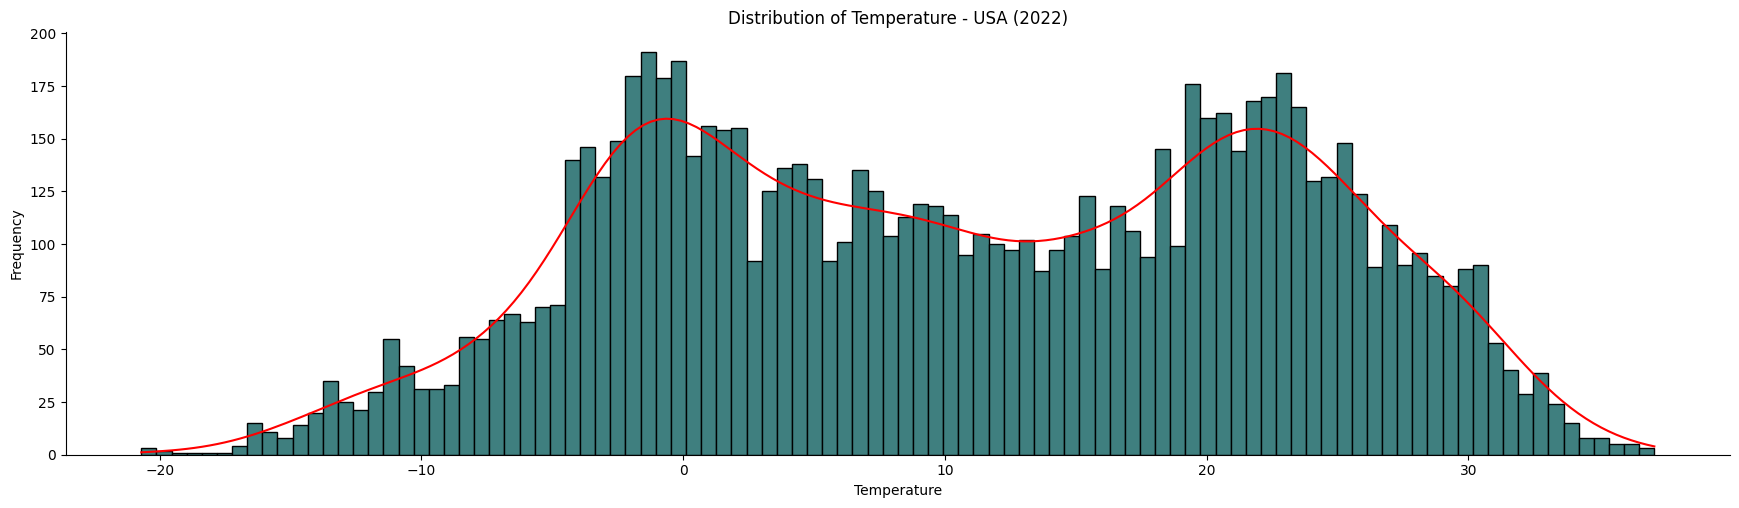

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of countries
countries = ['Germany', 'Japan', 'Spain', 'Turkey', 'USA']

# Specify the year
year = 2022

# Looping through each country
for country in countries:
    # Filter the dataframe for the current country and year
    country_year_df = df[(df['Country'] == country) & (df['Year'] == year)]
    
    # Create distribution plot using seaborn
    sns.displot(data=country_year_df, x="Temperature", kde=True, bins=100, color="red", facecolor="#3F7F7F", height=5, aspect=3.5)
    
    # Set plot title and axis labels
    plt.title("Distribution of Temperature - {} ({})".format(country, year))
    plt.xlabel("Temperature")
    plt.ylabel("Frequency")
    
    # Show the plot
    plt.show()


In [ ]:
df.columns


Index(['Year', 'Month', 'Day', 'Hour', 'Temperature', 'DHI', 'GHI', 'DNI',
       'Relative Humidity', 'Wind Speed', 'Wind Direction', 'Country'],
      dtype='object')

In [ ]:
df.shape


(43800, 12)

In [ ]:
df.duplicated().sum()


0

In [ ]:
df = df.drop_duplicates()


In [ ]:
df.duplicated().sum()


0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43800 entries, 0 to 43799
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               43800 non-null  int64  
 1   Month              43800 non-null  int64  
 2   Day                43800 non-null  int64  
 3   Hour               43800 non-null  int64  
 4   Temperature        43800 non-null  float64
 5   DHI                43800 non-null  int64  
 6   GHI                43800 non-null  int64  
 7   DNI                43800 non-null  int64  
 8   Relative Humidity  43800 non-null  float64
 9   Wind Speed         43800 non-null  float64
 10  Wind Direction     43800 non-null  int64  
 11  Country            43800 non-null  object 
dtypes: float64(3), int64(8), object(1)
memory usage: 4.3+ MB


**exploring the Correlation Matrix Heatmap of the Dataset**

<ipython-input-13-f3f9575d0822>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), ax=ax, annot=True)


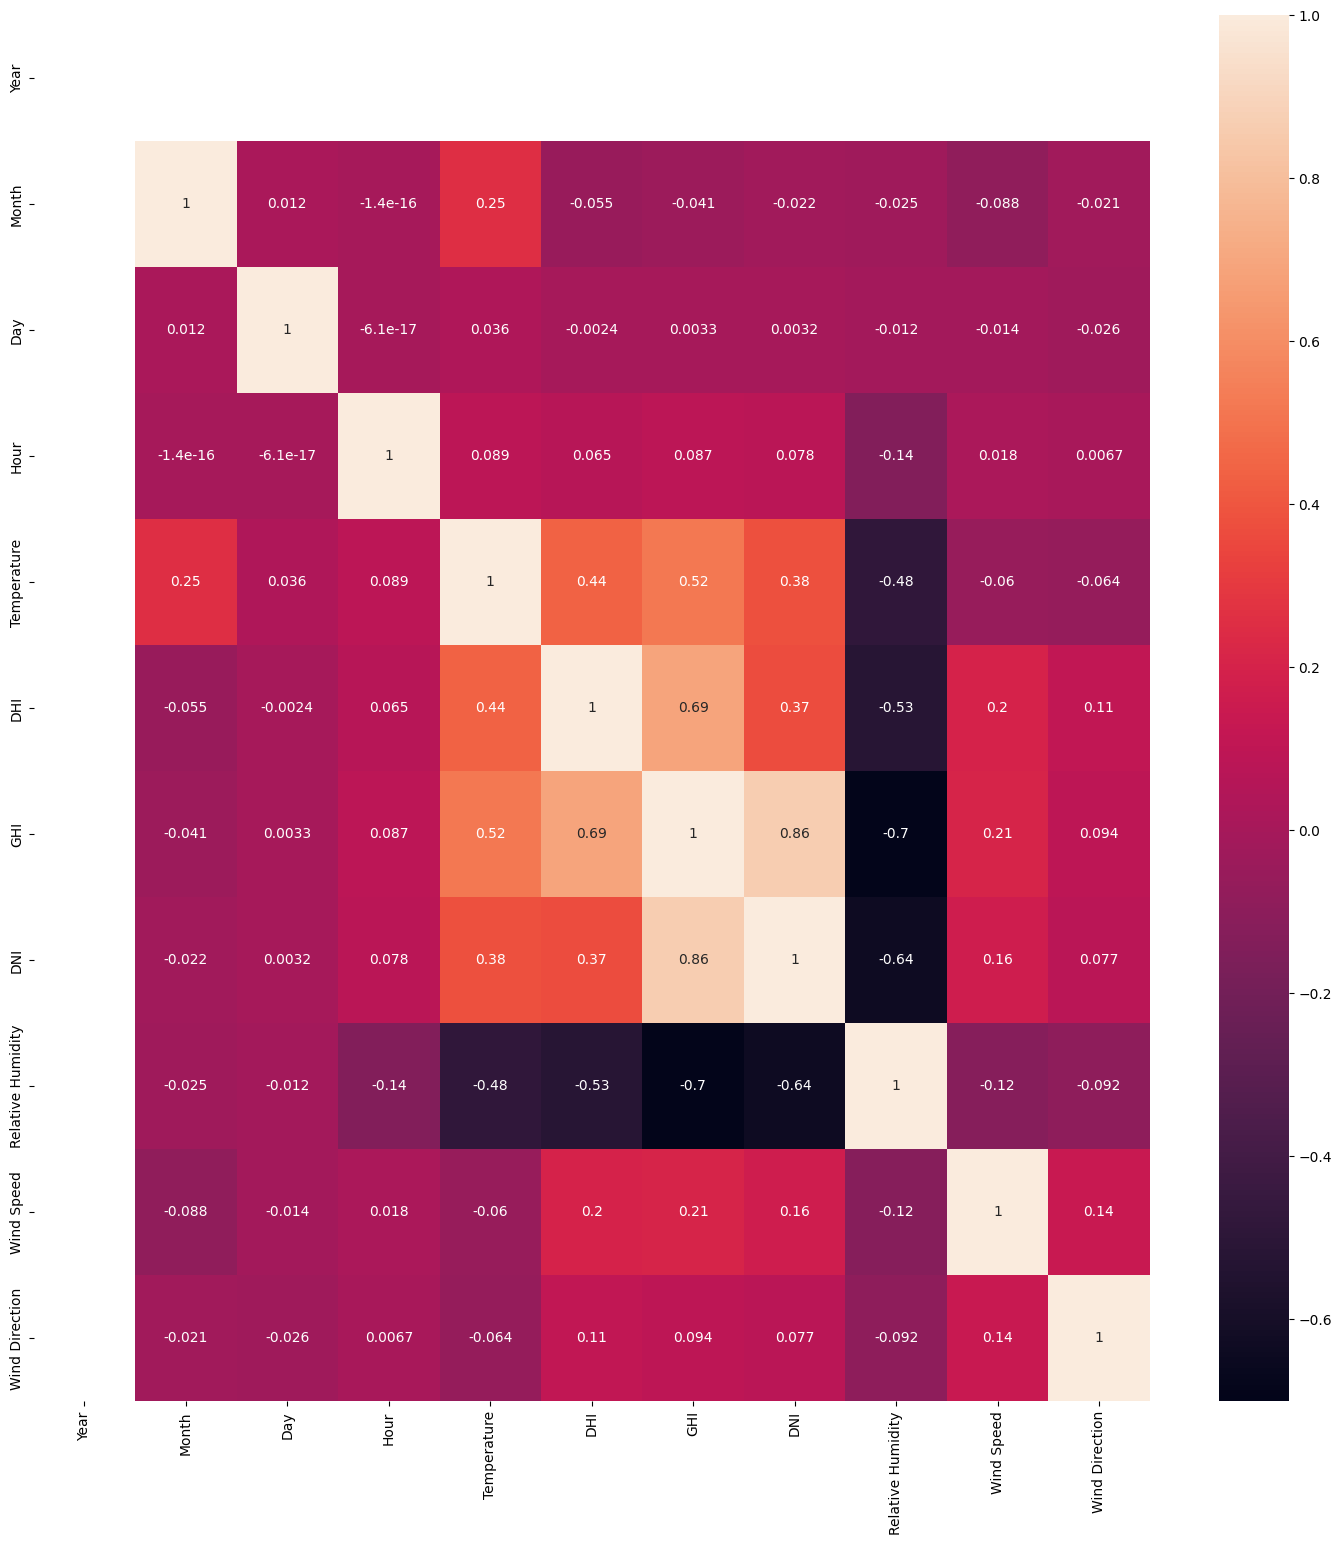

In [ ]:
fig, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), ax=ax, annot=True)
plt.show()


** Sorting Features by their Correlation with GHI**

In [ ]:
df.corr()['GHI'].sort_values(ascending=False)


<ipython-input-14-ac738c18dbe8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['GHI'].sort_values(ascending=False)


GHI                  1.000000
DNI                  0.863735
DHI                  0.690511
Temperature          0.515499
Wind Speed           0.207147
Wind Direction       0.094239
Hour                 0.086668
Day                  0.003292
Month               -0.040631
Relative Humidity   -0.700402
Year                      NaN
Name: GHI, dtype: float64

In [ ]:
df.columns[1:]


Index(['Month', 'Day', 'Hour', 'Temperature', 'DHI', 'GHI', 'DNI',
       'Relative Humidity', 'Wind Speed', 'Wind Direction', 'Country'],
      dtype='object')

**Hourly Variation of DHI for Each Day**

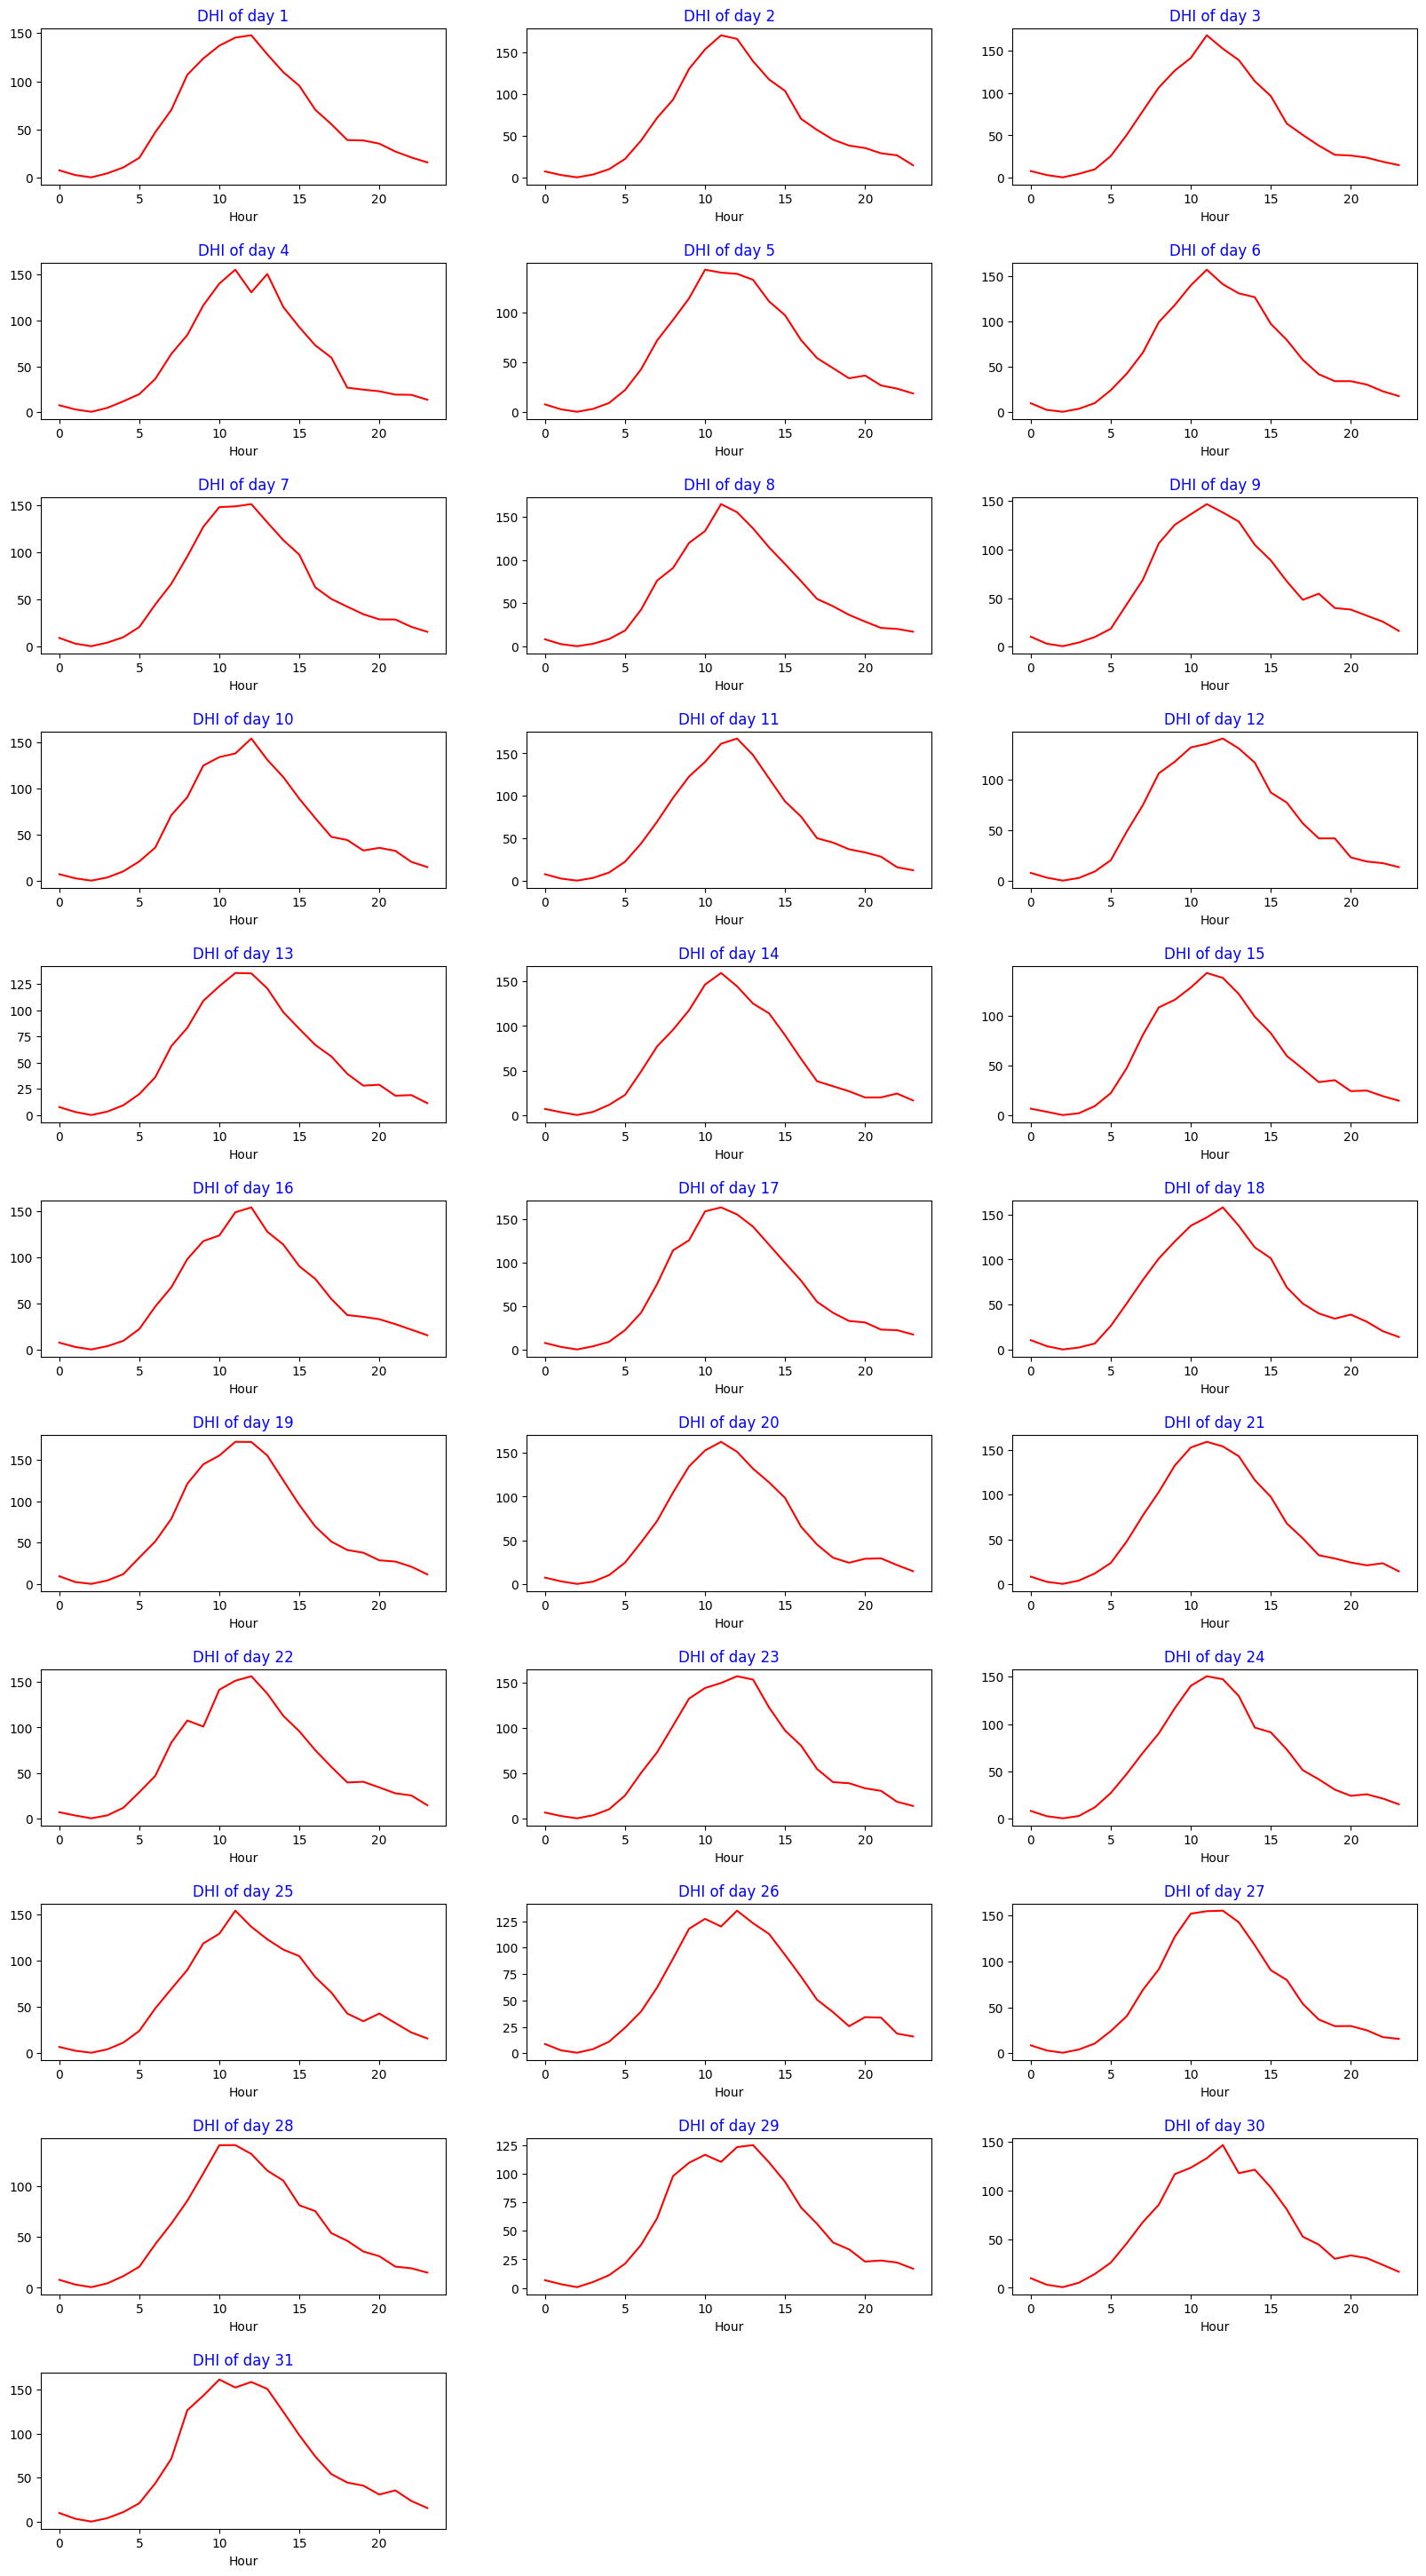

In [ ]:
#  pivot table for the desired variable
solar_temp = df.pivot_table(values='DHI', index='Hour', columns='Day')

#  the Daywise_plot function
def Daywise_plot(data=None, row=None, col=None, title='DHI of day'):
    cols = data.columns
    gp = plt.figure(figsize=(20,40)) 
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row, col, i)
        data[cols[i-1]].plot(ax=ax, color='red')
        ax.set_title('{} {}'.format(title, cols[i-1]), color='blue')
        
# call the Daywise_plot function with the temperature data
Daywise_plot(data=solar_temp, row=12, col=3)


**Total Daily Global Horizontal Irradiance (GHI)**

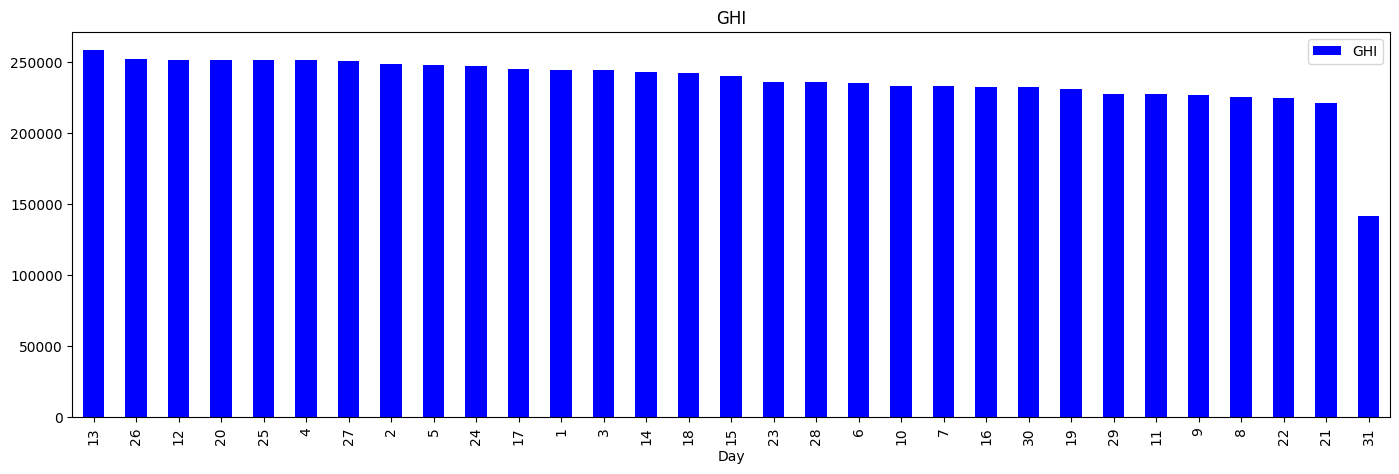

In [ ]:
daily_power = df.groupby('Day')['GHI'].agg('sum')

ax = daily_power.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='blue')
plt.title('GHI')
plt.show()


**Monthly Variation of Global Horizontal Irradiance (GHI)**

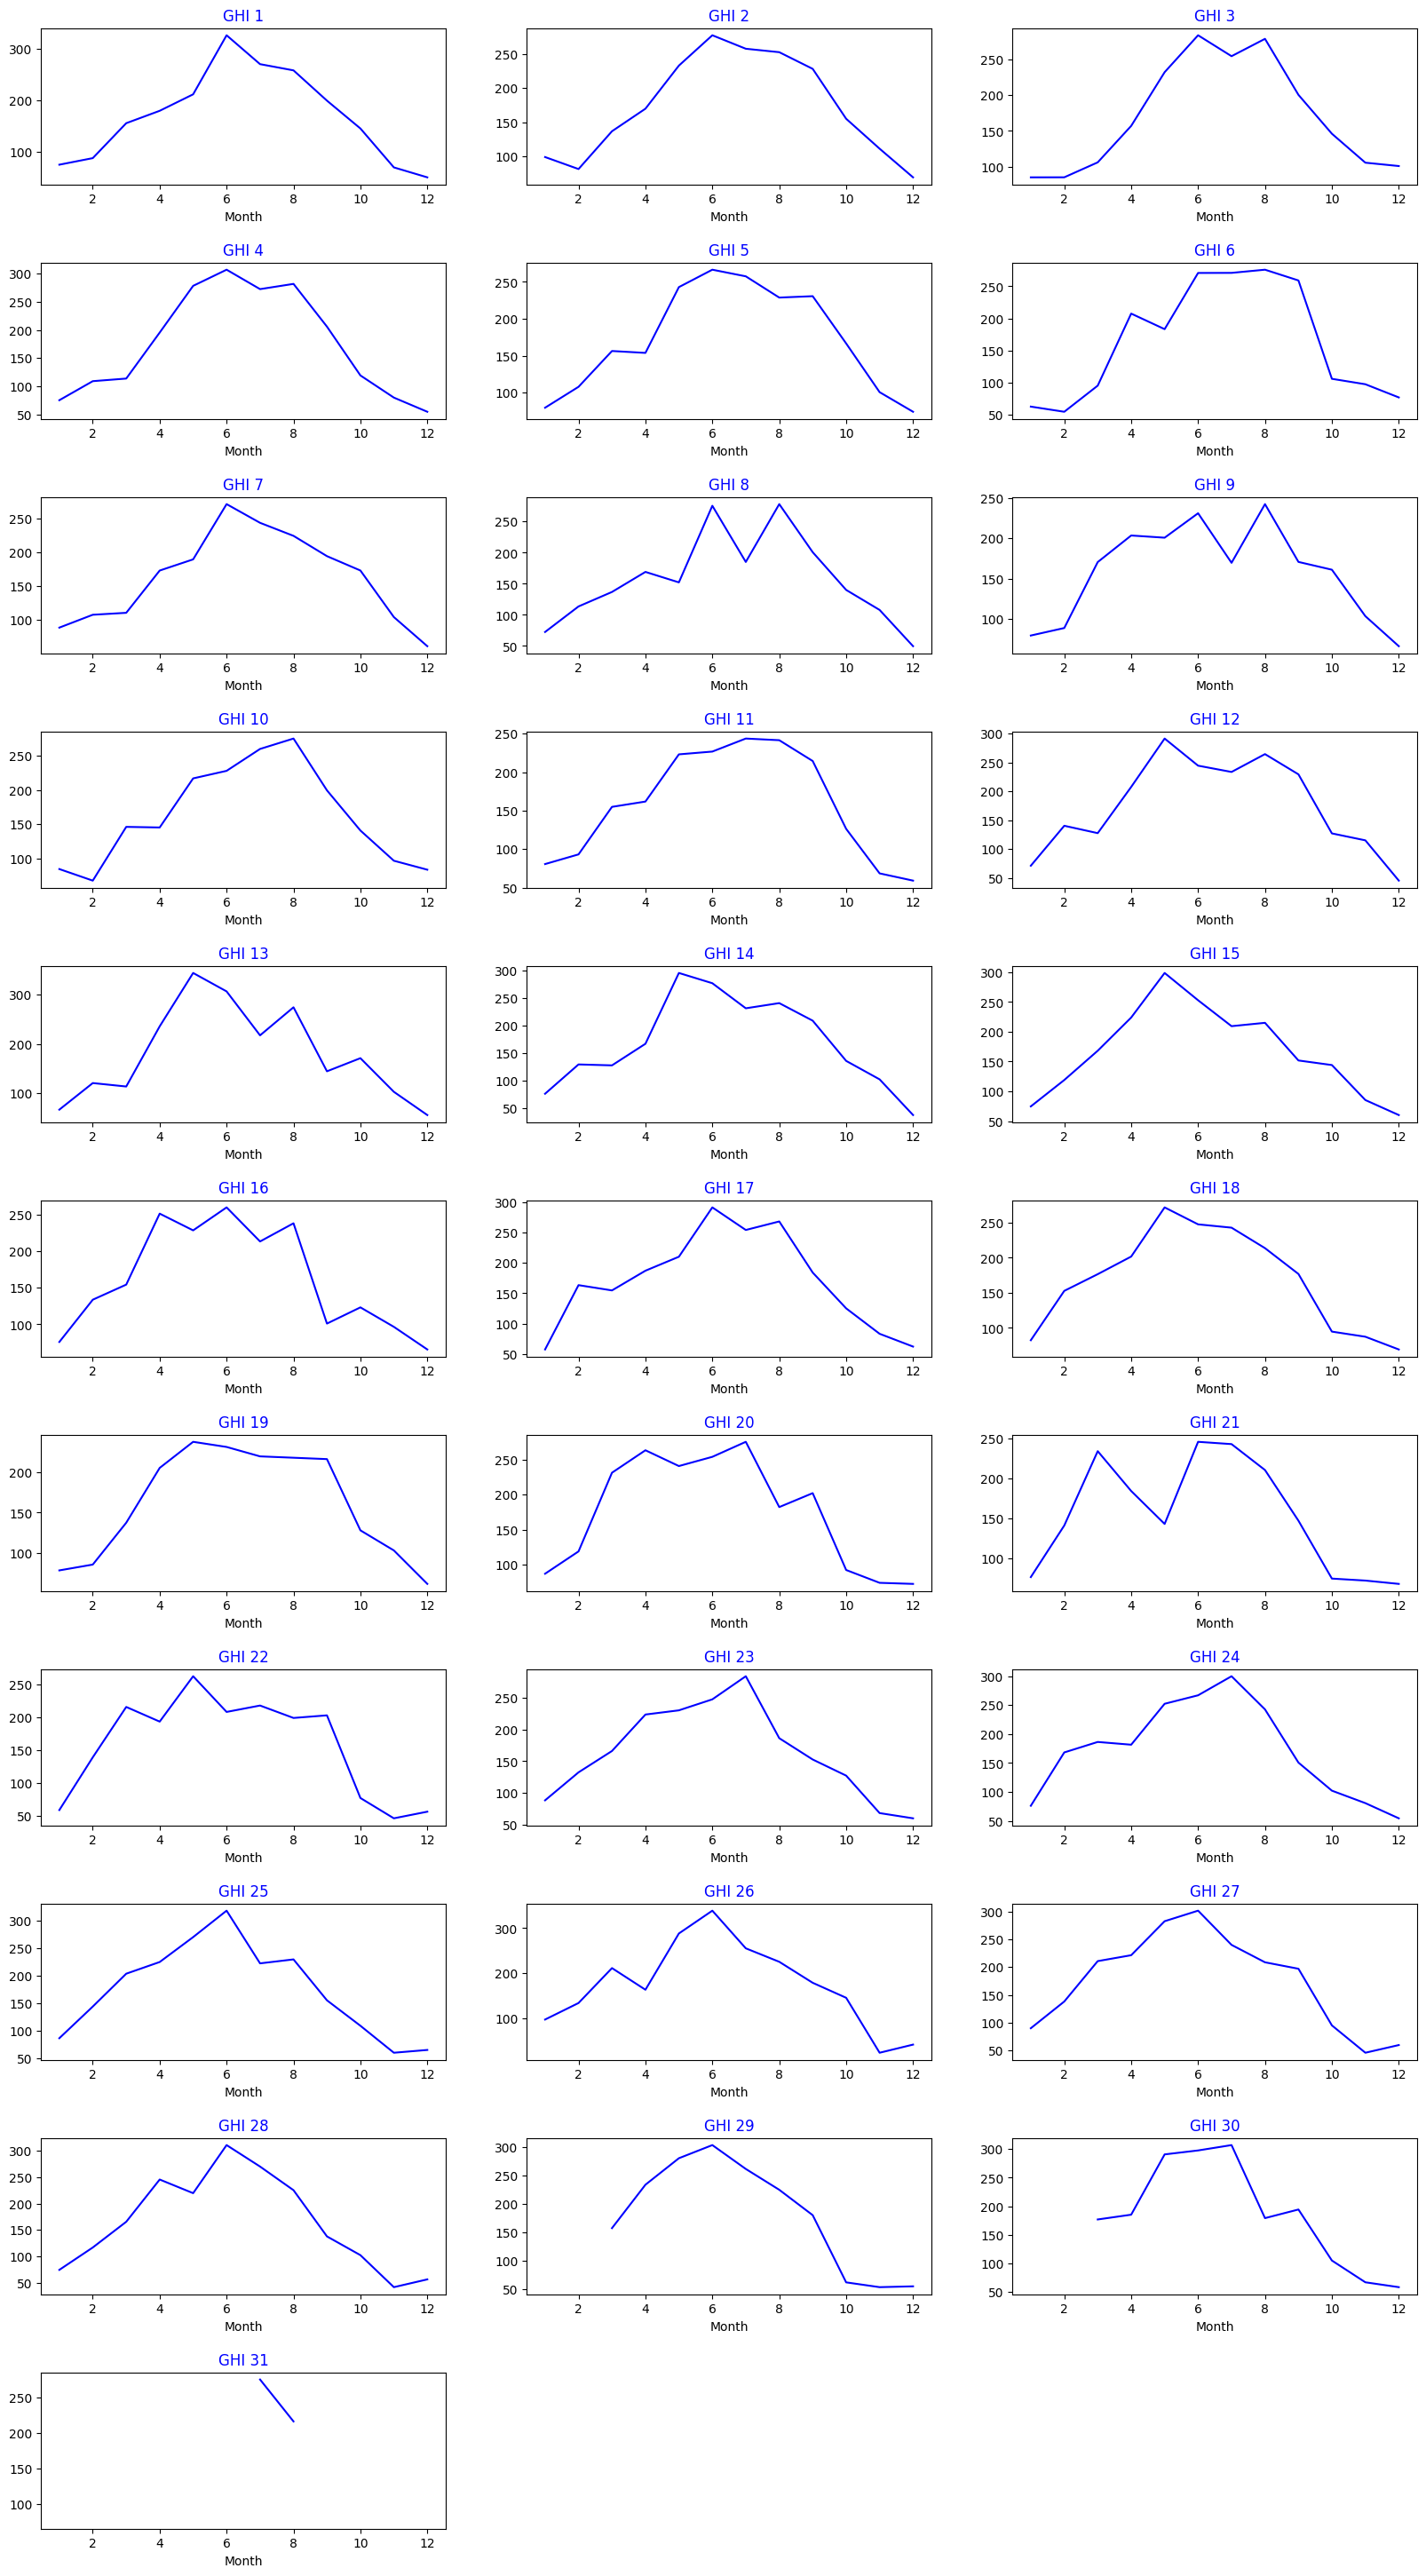

In [ ]:
solar_data = df.pivot_table(values='GHI', index='Month', columns='Day')

def Daywise_plot(data=None, row=None, col=None, title='GHI'):
    cols = data.columns
    gp = plt.figure(figsize=(20, 40))
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols) + 1):
        ax = gp.add_subplot(row, col, i)
        data[cols[i - 1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i - 1]), color='blue')

Daywise_plot(data=solar_data, row=12, col=3)


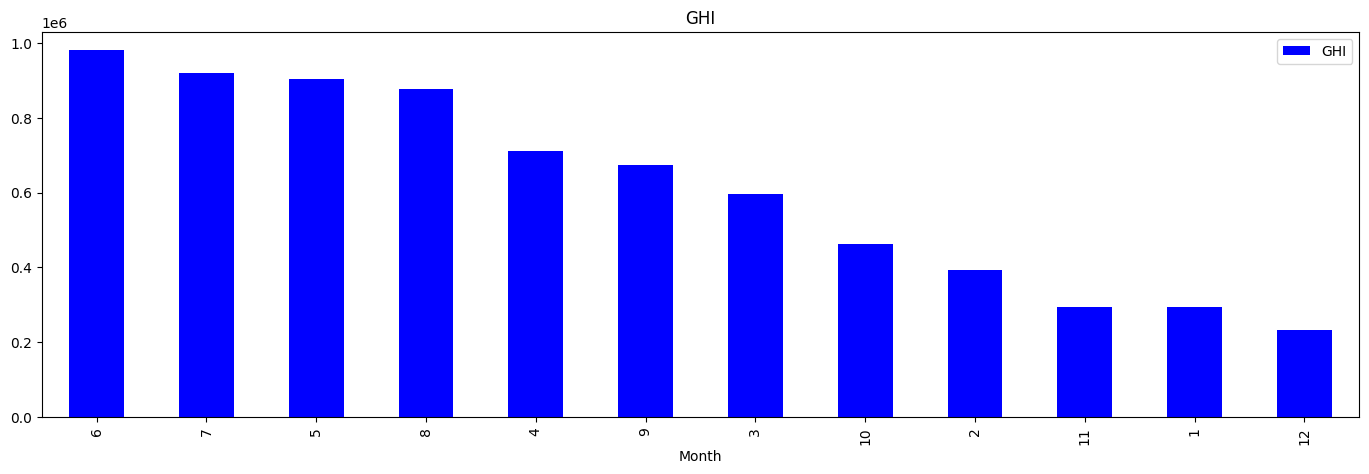

In [ ]:
daily_irradiation = df.groupby('Month')['GHI'].agg('sum')

daily_irradiation.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='blue')
plt.title('GHI')
plt.show()

**Monthly Variation of Global Horizontal Irradiance (GHI) for each country**

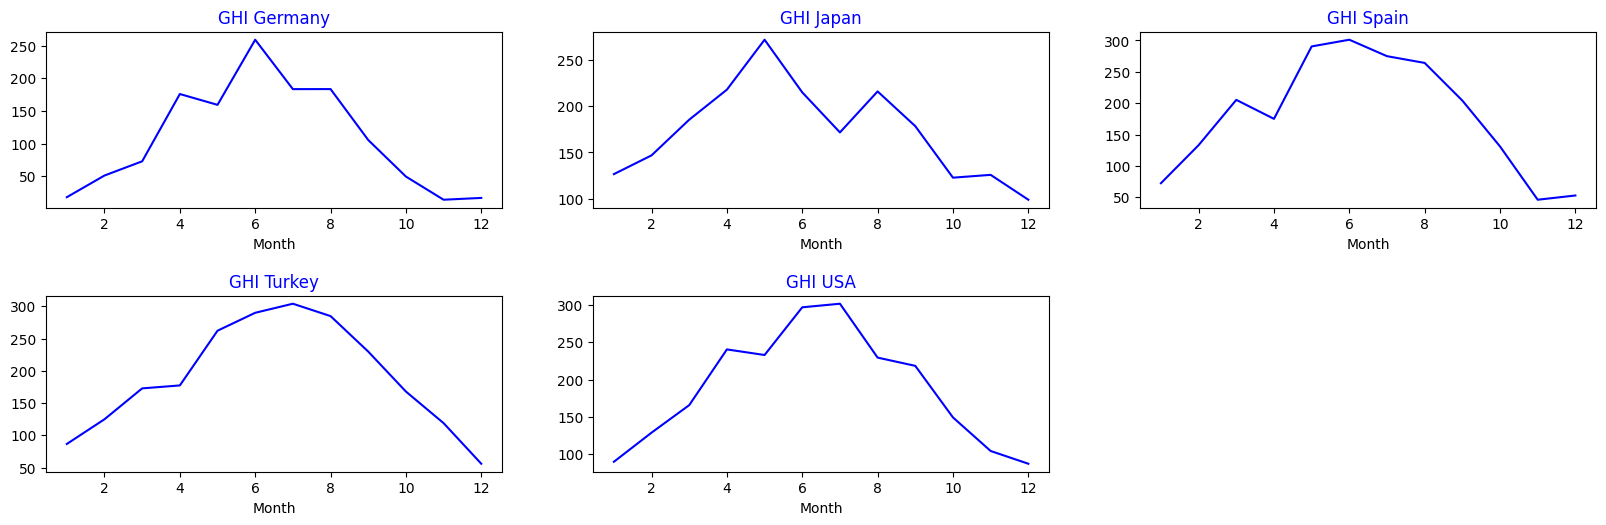

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Pivot the solar data
solar_data = df.pivot_table(values='GHI', index='Month', columns='Country')

def Daywise_plot(data=None, countries=None, row=None, col=None, title='GHI'):
    gp = plt.figure(figsize=(20, 40))
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    
    for i, country in enumerate(countries):
        ax = gp.add_subplot(row, col, i + 1)
        data[country].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, country), color='blue')

# List of countries
countries = ['Germany', 'Japan', 'Spain', 'Turkey', 'USA']

# Create the day-wise plots
Daywise_plot(data=solar_data, countries=countries, row=12, col=3)

# Show the plots
plt.show()


**Hourly Variation of Environmental Factors in Different for each country**

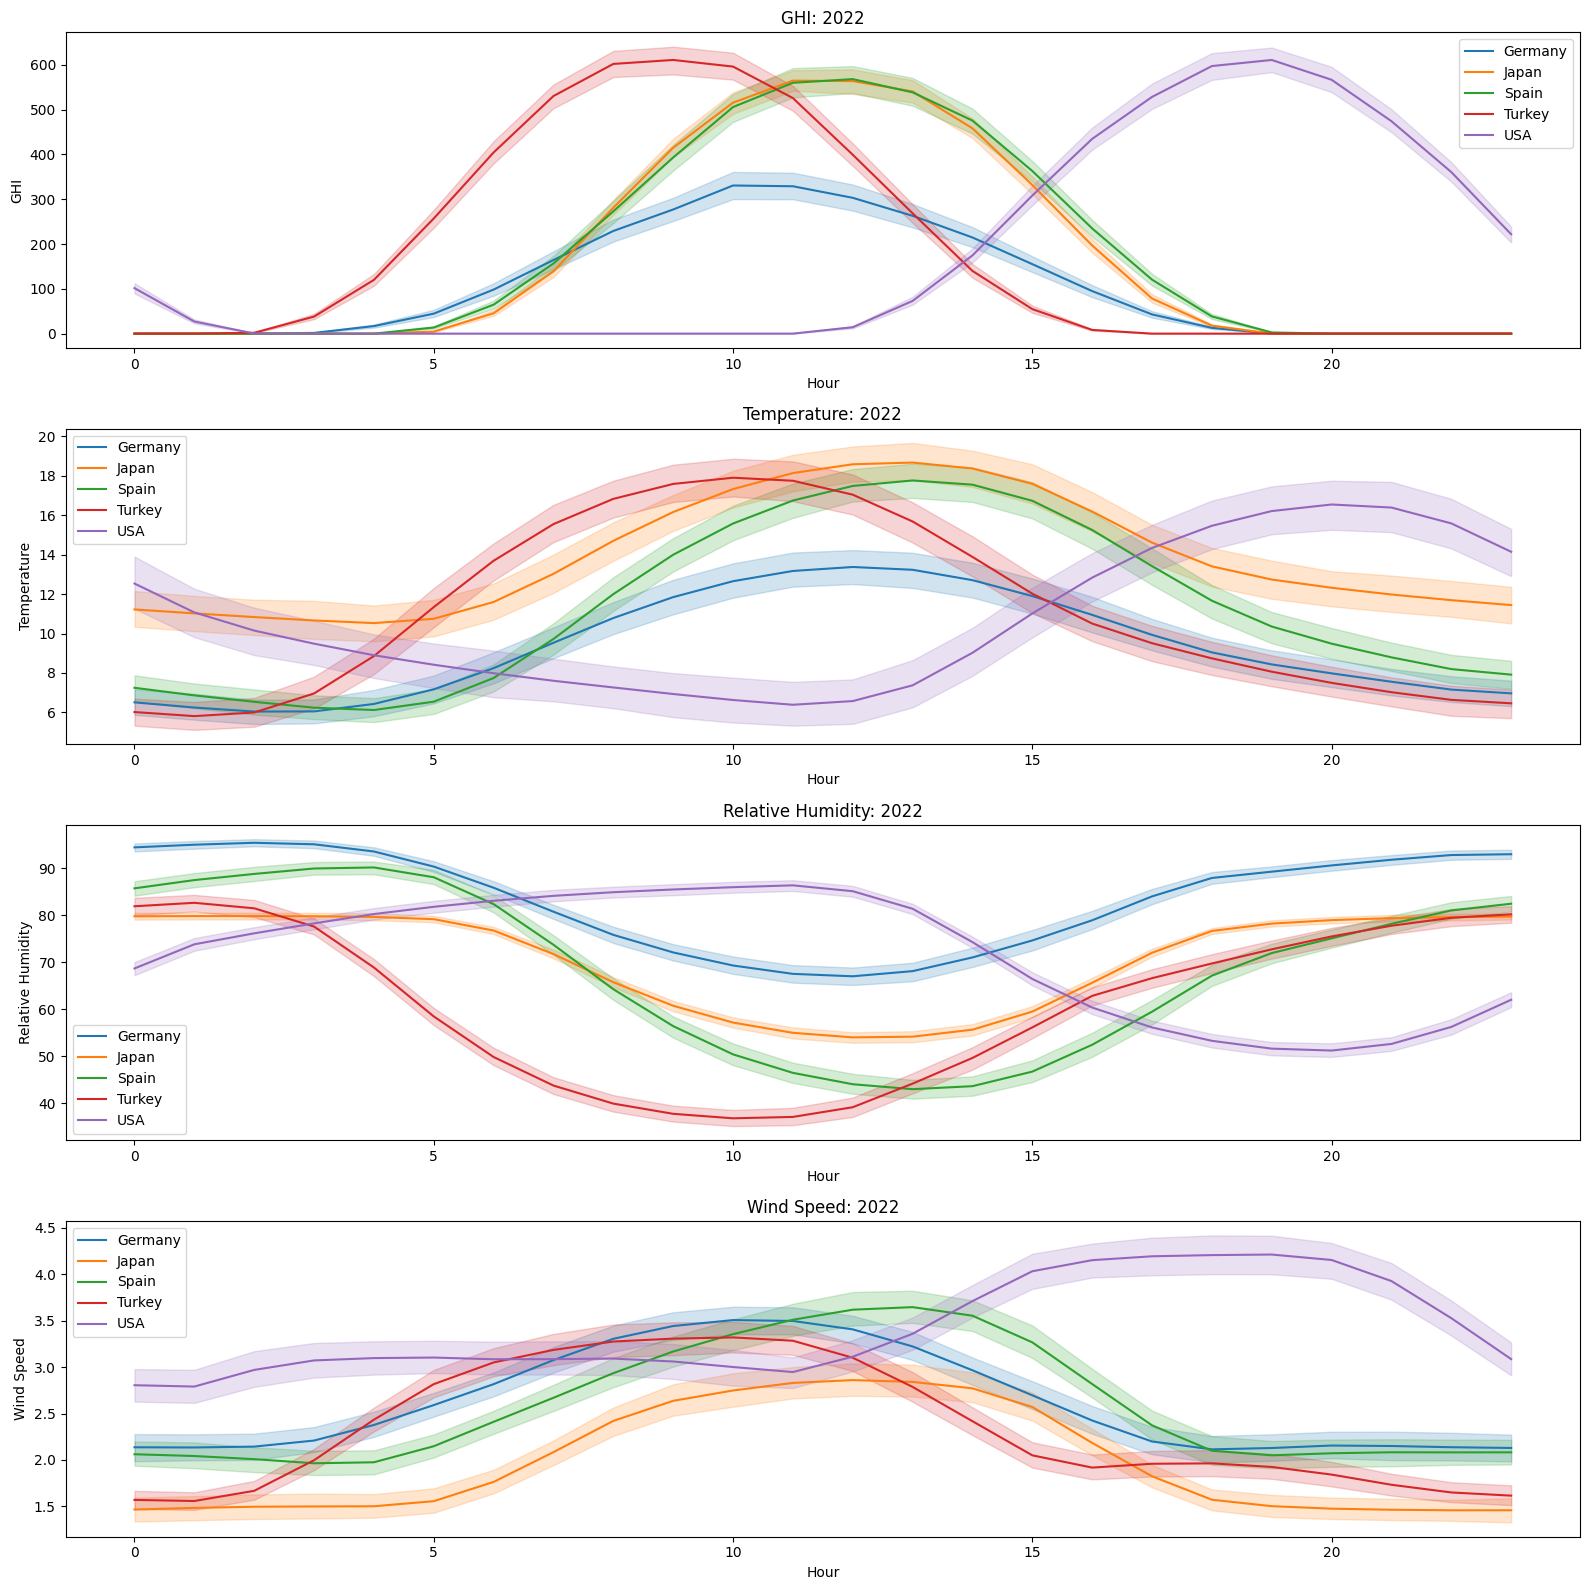

In [ ]:
import seaborn as sns

date = "2022"

plt.figure(figsize=(16, 16))

plt.subplot(411)
for country in countries:
    sns.lineplot(data=df[df['Country'] == country], x='Hour', y='GHI', label=country)
plt.title("GHI: {}".format(date))

plt.subplot(412)
for country in countries:
    sns.lineplot(data=df[df['Country'] == country], x='Hour', y='Temperature', label=country)
plt.title("Temperature: {}".format(date))

plt.subplot(413)
for country in countries:
    sns.lineplot(data=df[df['Country'] == country], x='Hour', y='Relative Humidity', label=country)
plt.title("Relative Humidity: {}".format(date))

plt.subplot(414)
for country in countries:
    sns.lineplot(data=df[df['Country'] == country], x='Hour', y='Wind Speed', label=country)
plt.title("Wind Speed: {}".format(date))


plt.tight_layout()
plt.show()


**Transforming Date and Time Components in the Dataset**

In [ ]:
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']])
df['Date_day'] = df['Date'].dt.date
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['hour'] = df['Date'].dt.hour
df.head()


Year  Month  Day  Hour  Temperature  DHI  GHI  DNI  Relative Humidity  \
0  2022      1    1     0          5.4    0    0    0             100.00   
1  2022      1    1     1          5.4    0    0    0              99.69   
2  2022      1    1     2          5.3    0    0    0              99.45   
3  2022      1    1     3          5.1    0    0    0              99.34   
4  2022      1    1     4          4.8    0    0    0              99.27   

   Wind Speed  Wind Direction  Country                Date    Date_day  month  \
0         3.8             261  Germany 2022-01-01 00:00:00  2022-01-01      1   
1         4.1             263  Germany 2022-01-01 01:00:00  2022-01-01      1   
2         4.5             264  Germany 2022-01-01 02:00:00  2022-01-01      1   
3         4.9             265  Germany 2022-01-01 03:00:00  2022-01-01      1   
4         5.3             266  Germany 2022-01-01 04:00:00  2022-01-01      1   

   day  hour  
0    1     0  
1    1     1  
2    1     2  
3    1     3  
4    1     4

In [ ]:
df_day = df.groupby(by=['Date_day', 'Country'])['Month', 'Day', 'Hour', 'Temperature', 'DHI', 'GHI', 'DNI', 'Relative Humidity'].mean().reset_index()
df_day.head()


<ipython-input-27-9c922c9ee16f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_day = df.groupby(by=['Date_day', 'Country'])['Month', 'Day', 'Hour', 'Temperature', 'DHI', 'GHI', 'DNI', 'Relative Humidity'].mean().reset_index()


Date_day  Country  Month  Day  Hour  Temperature        DHI         GHI  \
0  2022-01-01  Germany    1.0  1.0  11.5     3.833333   6.083333    8.416667   
1  2022-01-01    Japan    1.0  1.0  11.5     1.762500  31.791667  129.125000   
2  2022-01-01    Spain    1.0  1.0  11.5     3.245833  15.458333  109.375000   
3  2022-01-01   Turkey    1.0  1.0  11.5    -3.250000  47.333333   58.333333   
4  2022-01-01      USA    1.0  1.0  11.5   -12.104167  41.291667   73.083333   

          DNI  Relative Humidity  
0   22.583333          95.806667  
1  251.458333          64.638333  
2  304.041667          76.239583  
3   37.000000          78.729583  
4   99.333333          59.487083

**Daily Trend of GHI for each country**

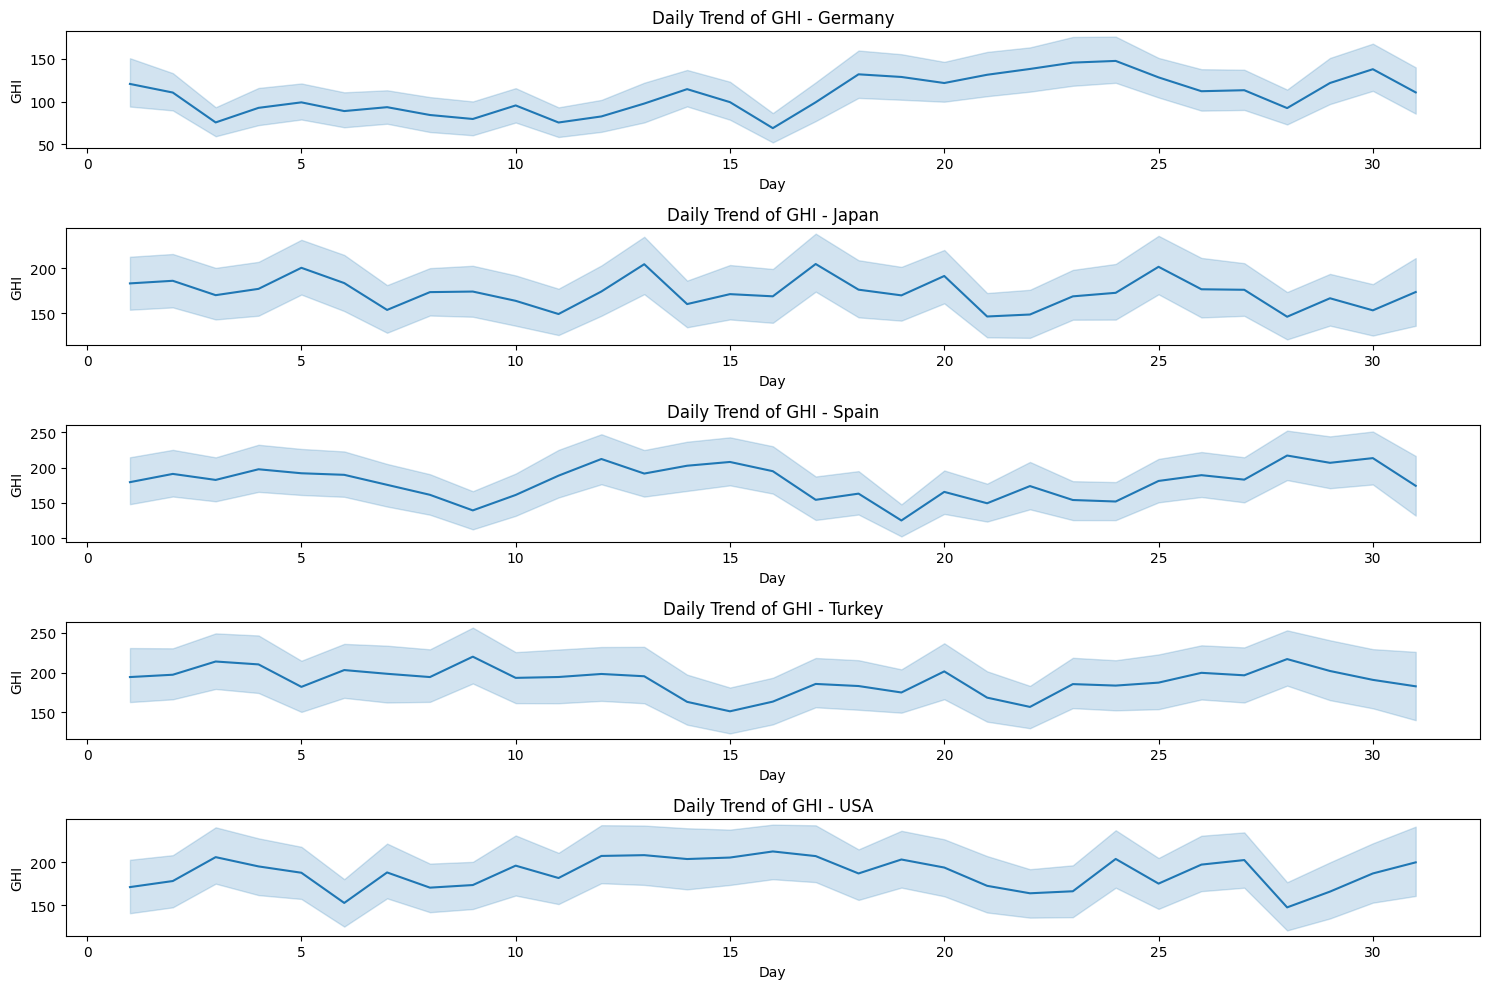

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of countries
countries = ['Germany', 'Japan', 'Spain', 'Turkey', 'USA']

# Create subplots for each country
fig, axes = plt.subplots(nrows=len(countries), figsize=(15, 10))

# Iterate over countries and plot daily trend of GHI
for i, country in enumerate(countries):
    # Filter the dataframe for the current country
    country_df = df[df['Country'] == country]
    
    # Create line plot using seaborn
    sns.lineplot(x='Day', y='GHI', data=country_df, ax=axes[i])
    
    # Set x-axis label for the last row
    if i == len(countries) - 1:
        axes[i].set_xlabel('Day')
    
    # Set y-axis label and plot title
    axes[i].set_ylabel('GHI')
    axes[i].set_title('Daily Trend of GHI - {}'.format(country))

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
mean_hourly = df.groupby(['Hour', 'Country']).mean().reset_index()
mean_hourly


<ipython-input-29-0f8053dc1d8e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_hourly = df.groupby(['Hour', 'Country']).mean().reset_index()


Hour  Country    Year     Month        Day  Temperature       DHI  \
0       0  Germany  2022.0  6.526027  15.720548     6.507671   0.00000   
1       0    Japan  2022.0  6.526027  15.720548    11.221644   0.00000   
2       0    Spain  2022.0  6.526027  15.720548     7.245753   0.00000   
3       0   Turkey  2022.0  6.526027  15.720548     6.015616   0.00000   
4       0      USA  2022.0  6.526027  15.720548    12.535616  40.49863   
..    ...      ...     ...       ...        ...          ...       ...   
115    23  Germany  2022.0  6.526027  15.720548     6.964384   0.00000   
116    23    Japan  2022.0  6.526027  15.720548    11.443562   0.00000   
117    23    Spain  2022.0  6.526027  15.720548     7.913973   0.00000   
118    23   Turkey  2022.0  6.526027  15.720548     6.458356   0.00000   
119    23      USA  2022.0  6.526027  15.720548    14.147397  76.09863   

            GHI         DNI  Relative Humidity  Wind Speed  Wind Direction  \
0      0.000000    0.000000          94.389863    2.136712      210.386301   
1      0.000000    0.000000          79.739425    1.466027      226.682192   
2      0.000000    0.000000          85.677890    2.061644      167.764384   
3      0.000000    0.000000          81.866685    1.569863      144.928767   
4    101.580822  220.249315          68.646575    2.804932      162.734247   
..          ...         ...                ...         ...             ...   
115    0.000000    0.000000          92.931397    2.129315      209.624658   
116    0.000000    0.000000          79.674219    1.458356      220.830137   
117    0.000000    0.000000          82.408192    2.082192      165.268493   
118    0.000000    0.000000          80.150959    1.615890      141.501370   
119  221.895890  397.627397          61.986466    3.086027      176.109589   

        month        day  hour  
0    6.526027  15.720548   0.0  
1    6.526027  15.720548   0.0  
2    6.526027  15.720548   0.0  
3    6.526027  15.720548   0.0  
4    6.526027  15.720548   0.0  
..        ...        ...   ...  
115  6.526027  15.720548  23.0  
116  6.526027  15.720548  23.0  
117  6.526027  15.720548  23.0  
118  6.526027  15.720548  23.0  
119  6.526027  15.720548  23.0  

[120 rows x 15 columns]

**Visualizing Average GHI by Hour for each country**

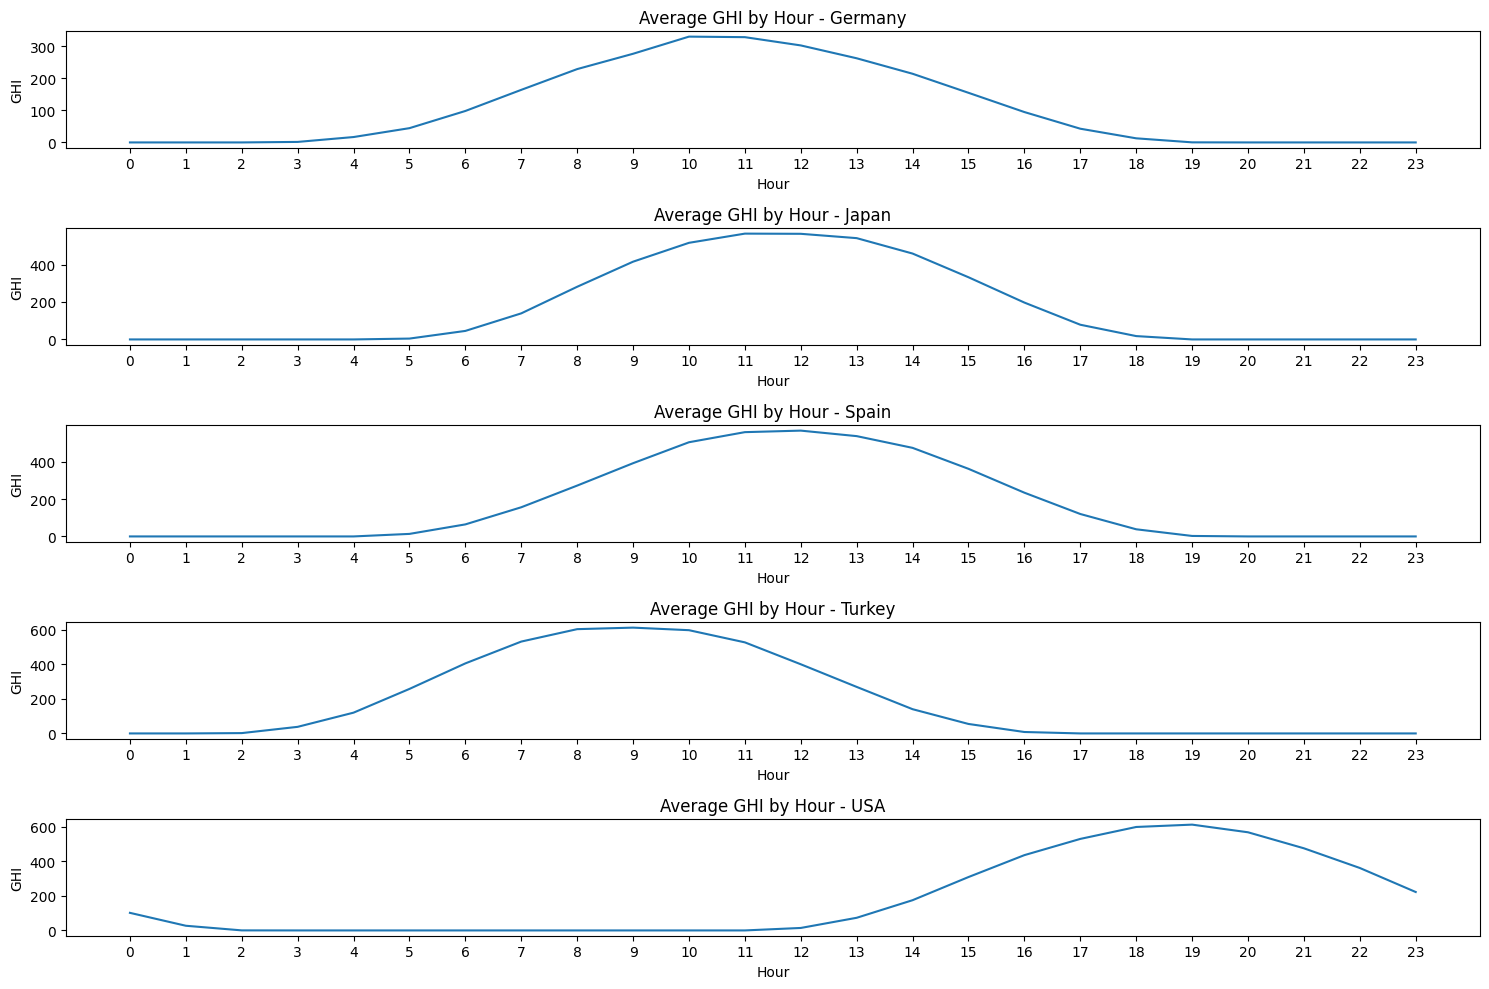

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of countries
countries = ['Germany', 'Japan', 'Spain', 'Turkey', 'USA']

# Create subplots for each country
fig, axes = plt.subplots(nrows=len(countries), figsize=(15, 10))

# Iterate over countries and plot average GHI by hour
for i, country in enumerate(countries):
    # Filter the dataframe for the current country
    country_df = df[df['Country'] == country]
    
    # Calculate the average GHI by hour
    avg_ghi_by_hour = country_df.groupby('Hour')['GHI'].mean()
    
    # Create line plot using seaborn
    sns.lineplot(x=avg_ghi_by_hour.index, y=avg_ghi_by_hour.values, ax=axes[i])
    
    # Set x-axis label and tick labels
    axes[i].set_xlabel('Hour')
    axes[i].set_xticks(range(24))
    axes[i].set_xticklabels(range(24))
    
    # Set y-axis label and plot title
    axes[i].set_ylabel('GHI')
    axes[i].set_title('Average GHI by Hour - {}'.format(country))

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
df.groupby(by='Month').mean()


<ipython-input-31-6de27cf416c3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='Month').mean()


Year   Day  Hour  Temperature        DHI         GHI         DNI  \
Month                                                                       
1      2022.0  16.0  11.5    -0.457339  28.291667   78.706183  139.122312   
2      2022.0  14.5  11.5     1.355982  42.882738  116.983036  167.741964   
3      2022.0  16.0  11.5     4.991290  59.821774  160.388172  185.469892   
4      2022.0  15.5  11.5     9.178278  80.823056  197.255000  191.032222   
5      2022.0  16.0  11.5    14.366909  91.308065  243.234677  230.077688   
6      2022.0  15.5  11.5    19.980611  96.833889  272.303889  256.311111   
7      2022.0  16.0  11.5    22.234409  89.260753  247.078495  237.912903   
8      2022.0  16.0  11.5    22.673871  80.755108  235.500269  241.563978   
9      2022.0  15.5  11.5    18.652028  60.975000  187.221111  221.134722   
10     2022.0  16.0  11.5    12.688172  43.993280  124.112366  165.984140   
11     2022.0  15.5  11.5     6.038806  28.759722   81.870278  132.495278   
12     2022.0  16.0  11.5     2.986425  23.684946   62.416935  114.901344   

       Relative Humidity  Wind Speed  Wind Direction  month   day  hour  
Month                                                                    
1              80.453839    3.166317      220.648925    1.0  16.0  11.5  
2              74.923574    2.731339      212.050595    2.0  14.5  11.5  
3              72.498911    3.084005      202.527151    3.0  16.0  11.5  
4              71.044369    2.730583      192.195556    4.0  15.5  11.5  
5              67.452255    2.475161      197.640323    5.0  16.0  11.5  
6              66.992253    2.202750      184.972500    6.0  15.5  11.5  
7              64.050384    2.177231      176.493011    7.0  16.0  11.5  
8              64.638667    2.143844      166.727957    8.0  16.0  11.5  
9              65.592792    2.442306      186.678889    9.0  15.5  11.5  
10             69.640675    2.533817      202.036559   10.0  16.0  11.5  
11             75.827564    2.729500      219.156389   11.0  15.5  11.5  
12             80.830016    2.650995      210.763441   12.0  16.0  11.5

**Visualizing Average GHI by Month for each country**

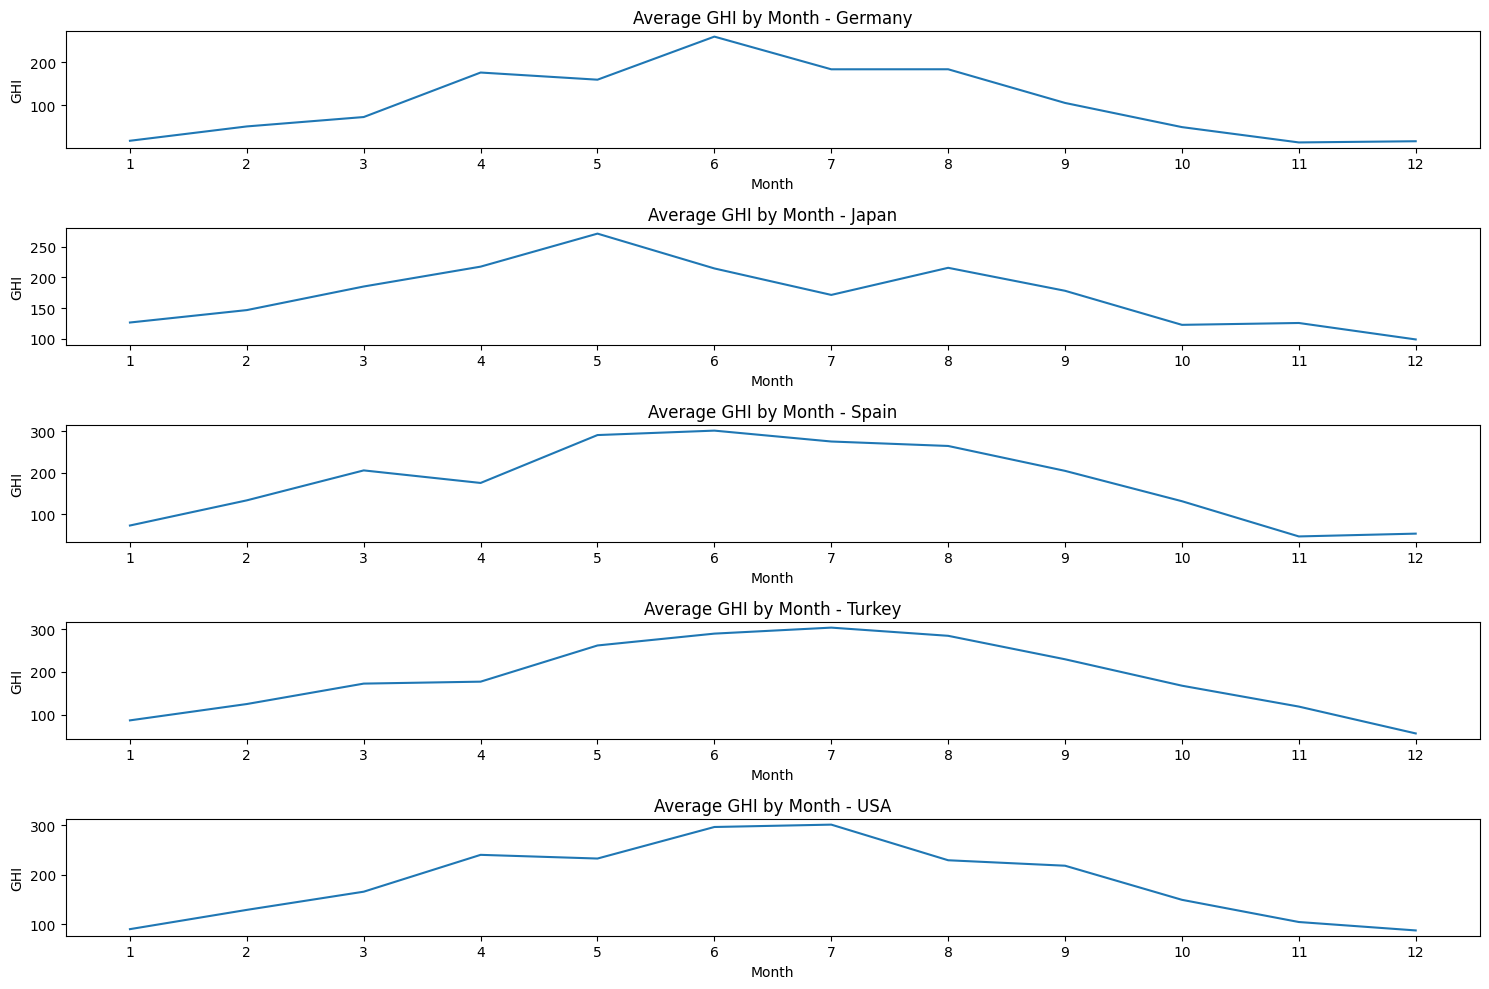

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of countries
countries = ['Germany', 'Japan', 'Spain', 'Turkey', 'USA']

# Create subplots for each country
fig, axes = plt.subplots(nrows=len(countries), figsize=(15, 10))

# Iterate over countries and plot average GHI by month
for i, country in enumerate(countries):
    # Filter the dataframe for the current country
    country_df = df[df['Country'] == country]
    
    # Calculate the average GHI by month
    avg_ghi_by_month = country_df.groupby('Month')['GHI'].mean()
    
    # Create line plot using seaborn
    sns.lineplot(x=avg_ghi_by_month.index, y=avg_ghi_by_month.values, ax=axes[i])
    
    # Set x-axis label and tick labels
    axes[i].set_xlabel('Month')
    axes[i].set_xticks(range(1, 13))
    axes[i].set_xticklabels(range(1, 13))
    
    # Set y-axis label and plot title
    axes[i].set_ylabel('GHI')
    axes[i].set_title('Average GHI by Month - {}'.format(country))

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1

print(IQR)

Year                   0.0000
Month                  6.0000
Day                   15.0000
Hour                  11.5000
Temperature           15.5000
DHI                   92.0000
GHI                  273.0000
DNI                  298.0000
Relative Humidity     32.0925
Wind Speed             2.2000
Wind Direction       158.2500
month                  6.0000
day                   15.0000
hour                  11.5000
dtype: float64


<ipython-input-34-fb2b0eb11e03>:1: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-34-fb2b0eb11e03>:2: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
IQR = IQR[:7]
IQR

Year             0.0
Month            6.0
Day             15.0
Hour            11.5
Temperature     15.5
DHI             92.0
GHI            273.0
dtype: float64

In [ ]:
df.shape


(43800, 17)

In [ ]:
df.columns


Index(['Year', 'Month', 'Day', 'Hour', 'Temperature', 'DHI', 'GHI', 'DNI',
       'Relative Humidity', 'Wind Speed', 'Wind Direction', 'Country', 'Date',
       'Date_day', 'month', 'day', 'hour'],
      dtype='object')

In [ ]:
df = df.loc[:, ~df.columns.duplicated()]


In [ ]:
numeric_features = ['Temperature', 'DHI', 'GHI', 'DNI', 'Relative Humidity', 'Wind Speed']
for f in numeric_features:
    if f in df.columns:
        q1 = df[f].quantile(0.25)
        q3 = df[f].quantile(0.75)
        IQR = q3 - q1
        outliers_percentage = ((df[f] < (q1 - 1.5 * IQR)) | (df[f] > (q3 + 1.5 * IQR))).mean() * 100
        print(f"Percentage of outliers for {f}: {outliers_percentage:.2f}%")


Percentage of outliers for Temperature: 0.01%
Percentage of outliers for DHI: 7.42%
Percentage of outliers for GHI: 7.61%
Percentage of outliers for DNI: 12.55%
Percentage of outliers for Relative Humidity: 0.01%
Percentage of outliers for Wind Speed: 2.10%


In [ ]:
#Model Building
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score


from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks

In [ ]:
df = df[features]
df.head()


Temperature  DHI  GHI  DNI  Relative Humidity  Wind Speed  Country
0          5.4    0    0    0             100.00         3.8  Germany
1          5.4    0    0    0              99.69         4.1  Germany
2          5.3    0    0    0              99.45         4.5  Germany
3          5.1    0    0    0              99.34         4.9  Germany
4          4.8    0    0    0              99.27         5.3  Germany

In [ ]:
# Train test split
X = df.drop(["GHI"], axis=1)  # Excluding the target variable from the features
y = df["GHI"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X.shape


(43800, 6)

In [ ]:
X


Temperature  DHI  DNI  Relative Humidity  Wind Speed  Country
0              5.4    0    0             100.00         3.8  Germany
1              5.4    0    0              99.69         4.1  Germany
2              5.3    0    0              99.45         4.5  Germany
3              5.1    0    0              99.34         4.9  Germany
4              4.8    0    0              99.27         5.3  Germany
...            ...  ...  ...                ...         ...      ...
43795          2.2   71  940              65.80         2.9      USA
43796          2.6   64  922              64.84         2.6      USA
43797          2.6   59  856              68.10         1.8      USA
43798          0.7   43  741              70.92         1.2      USA
43799         -2.0   17  418              61.81         1.5      USA

[43800 rows x 6 columns]

In [ ]:
countries = ['Germany', 'USA', 'Turkey', 'Japan', 'Spain']  # List of countries

# Dictionary to store the train-test split data for each country
data_splits = {}

for country in countries:
    country_data = df  
    
    X = country_data.drop(["GHI"], axis=1)  # Exclude the target variable from the features
    y = country_data["GHI"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # Store the train-test split data for the current country in the dictionary
    data_splits[country] = {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test
    }


In [ ]:
from sklearn.preprocessing import StandardScaler

# Dictionary to store the scaled data for each country
scaled_data = {}

for country, data in data_splits.items():
    X_train = data['X_train']
    X_test = data['X_test']
    
    # Exclude the country column from scaling
    X_train_scaled = X_train.drop('Country', axis=1)
    X_test_scaled = X_test.drop('Country', axis=1)
    
    # Initialize the scaler for each country
    scaler = StandardScaler()
    
    # Fit and transform the training data
    X_train_scaled = scaler.fit_transform(X_train_scaled)
    
    # Transform the test data using the trained scaler
    X_test_scaled = scaler.transform(X_test_scaled)
    
    # Store the scaled data for the current country in the dictionary
    scaled_data[country] = {
        'X_train': X_train_scaled,
        'X_test': X_test_scaled,
        'y_train': data['y_train'],
        'y_test': data['y_test']
    }

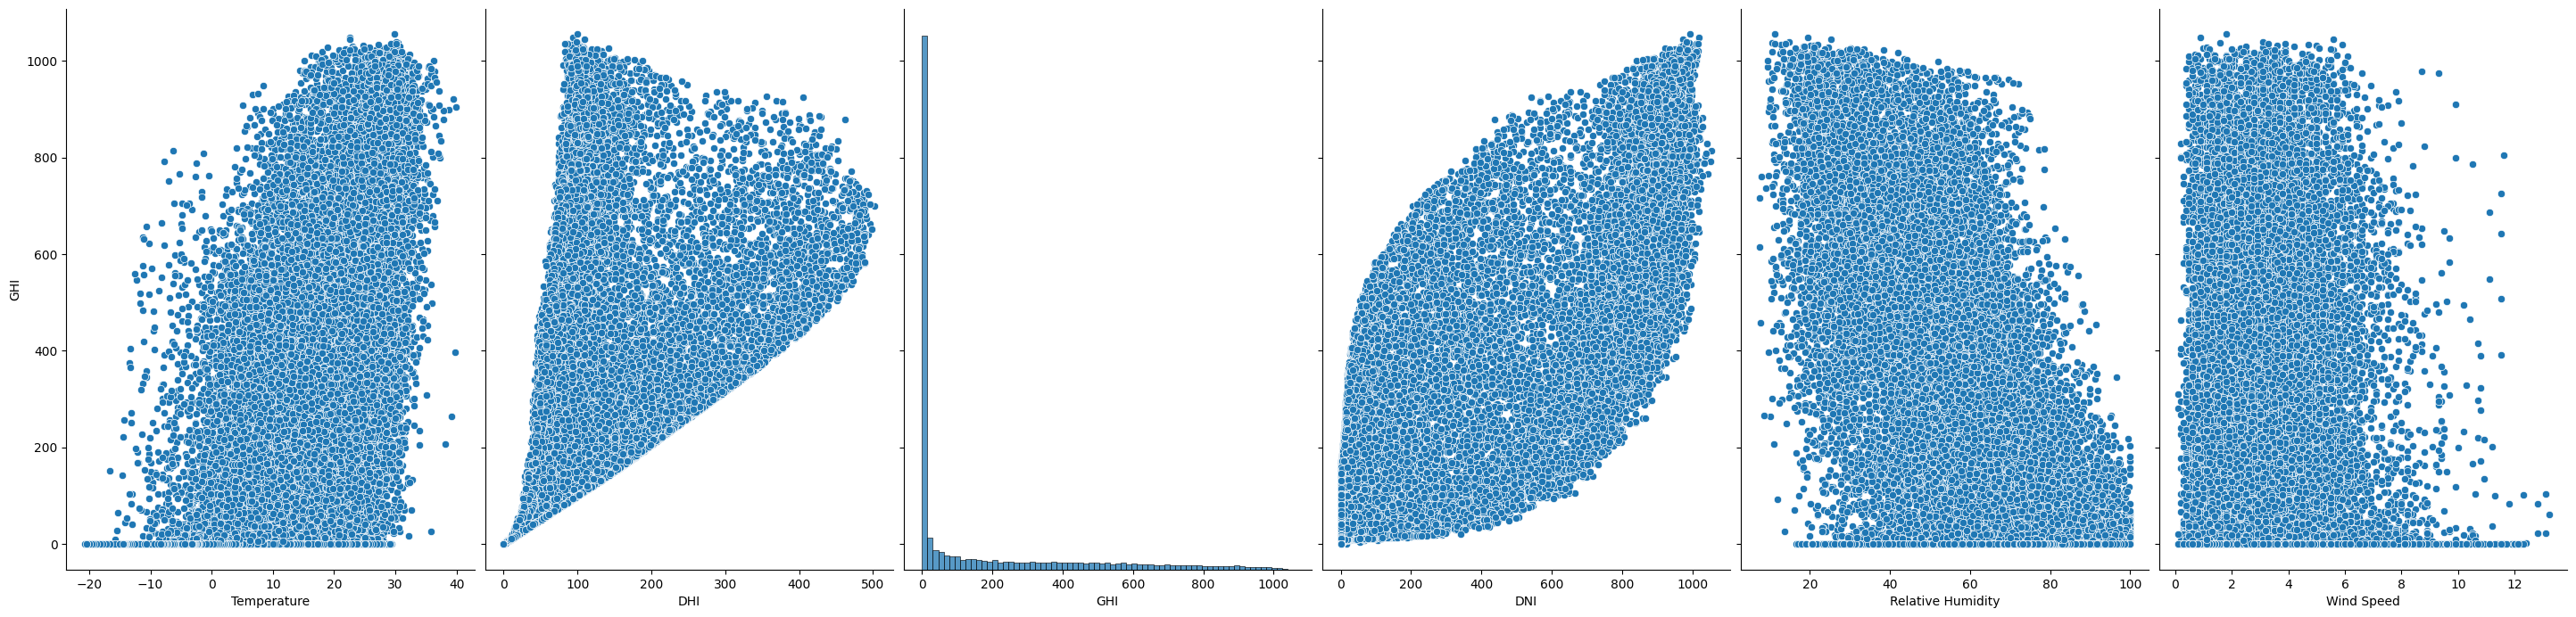

In [ ]:
#create a pair plot
p = sns.pairplot(df, x_vars=['Temperature', 'DHI', 'GHI', 'DNI', 'Relative Humidity', 'Wind Speed'], y_vars='GHI', height=7, aspect=0.7)


 **Model Building: Random Forest Regression **




In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and testing sets
X = df.drop(['GHI'], axis=1)  # Replace 'df' with your actual DataFrame
y = df['GHI']

countries = df['Country'].unique()

for country in countries:
    print(f"Country: {country}")
    X_country = X.loc[df['Country'] == country]
    y_country = y.loc[df['Country'] == country]

    # Perform one-hot encoding for the 'Country' column
    encoder = OneHotEncoder(sparse=False)
    X_encoded = encoder.fit_transform(X_country[['Country']])

    # Combine encoded features with remaining features
    X_country_encoded = np.concatenate((X_encoded, X_country.drop(['Country'], axis=1)), axis=1)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_country_encoded, y_country, test_size=0.2, random_state=0)

    # Feature Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the Random Forest Regression model
    rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)  # Adjust hyperparameters
    rf_model.fit(X_train_scaled, y_train)

    # Make predictions with Random Forest Regression
    y_pred_rf = rf_model.predict(X_test_scaled)

    # Evaluate the model
    rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
    rf_r2 = r2_score(y_test, y_pred_rf)

    # Print the solar prediction and evaluation metrics for the model
    print("Random Forest Regression:")
    print("Solar Prediction:")
    print(y_pred_rf)
    print("RMSE:", rf_rmse)
    print("R^2 Score:", rf_r2)
    print()


Country: Germany
Random Forest Regression:
Solar Prediction:
[3. 0. 0. ... 0. 0. 0.]
RMSE: 7.917074256985078
R^2 Score: 0.9984664364658684

Country: Japan
Random Forest Regression:
Solar Prediction:
[0. 0. 0. ... 0. 0. 0.]
RMSE: 13.336444922580334
R^2 Score: 0.9972453473959326

Country: Spain
Random Forest Regression:
Solar Prediction:
[0. 0. 0. ... 0. 0. 0.]
RMSE: 14.74247134436288
R^2 Score: 0.9970192454502969

Country: Turkey
Random Forest Regression:
Solar Prediction:
[11.9730333  0.         0.        ...  0.         0.         0.       ]
RMSE: 16.34143462402544
R^2 Score: 0.9967689033150646

Country: USA
Random Forest Regression:
Solar Prediction:
[  0.           0.         396.15171697 ... 305.22304519 168.05585523
   0.        ]
RMSE: 14.832461386715703
R^2 Score: 0.9972367374094732



**Model Building: Gradient Boosting Regression **

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and testing sets
X = df.drop(['GHI'], axis=1)  # Replace 'df' with your actual DataFrame
y = df['GHI']

countries = df['Country'].unique()

for country in countries:
    print(f"Country: {country}")
    X_country = X.loc[df['Country'] == country]
    y_country = y.loc[df['Country'] == country]

    # Perform one-hot encoding for the 'Country' column
    encoder = OneHotEncoder(sparse=False)
    X_encoded = encoder.fit_transform(X_country[['Country']])

    # Combine encoded features with remaining features
    X_country_encoded = np.concatenate((X_encoded, X_country.drop(['Country'], axis=1)), axis=1)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_country_encoded, y_country, test_size=0.2, random_state=0)

    # Create a pipeline with feature scaling and GBR model
    pipeline = make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=0))

    # Define the hyperparameter grid for grid search
    param_grid = {
        'gradientboostingregressor__learning_rate': [0.1, 0.05, 0.01],
        'gradientboostingregressor__n_estimators': [100, 200, 300],
        'gradientboostingregressor__max_depth': [3, 4, 5],
    }

    # Perform grid search to find the best hyperparameters
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_root_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # Get the best model from grid search
    gbr_model = grid_search.best_estimator_

    # Make predictions with GBR
    y_pred_gbr = gbr_model.predict(X_test)

    # Evaluating the GBR model
    gbr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
    gbr_r2 = r2_score(y_test, y_pred_gbr)

    # Print the solar prediction and evaluation metrics for GBR
    print("Gradient Boosting Regression:")
    print("Solar Prediction:")
    print(y_pred_gbr)
    print("RMSE:", gbr_rmse)
    print("R^2 Score:", gbr_r2)
    print()


Country: Germany
Gradient Boosting Regression:
Solar Prediction:
[3.04564692 0.02161239 0.02121187 ... 0.02161239 0.02121187 0.02121187]
RMSE: 7.7857249618997555
R^2 Score: 0.9985168999416844

Country: Japan
Gradient Boosting Regression:
Solar Prediction:
[ 0.02377959  0.02377959 -0.01210689 ...  0.02377959 -0.01688508
  0.02377959]
RMSE: 11.593450540844005
R^2 Score: 0.997918328902257

Country: Spain
Gradient Boosting Regression:
Solar Prediction:
[0.00281033 0.02127169 0.02127169 ... 0.02127169 0.00281033 0.00281033]
RMSE: 12.84318449413829
R^2 Score: 0.9977377996068237

Country: Turkey
Gradient Boosting Regression:
Solar Prediction:
[ 1.16850440e+01 -4.47960888e-02 -1.37459548e-02 ...  5.34125646e-03
 -2.60255224e-01 -2.76315761e-01]
RMSE: 13.827831976849792
R^2 Score: 0.997686455914569

Country: USA
Gradient Boosting Regression:
Solar Prediction:
[ 9.41588765e-02  7.80995974e-02  3.80532000e+02 ...  3.09523561e+02
  1.79929986e+02 -3.39216231e-02]
RMSE: 13.456257162910523
R^2 Score

**Comparing the Performance of Random Forest Regression and Gradient Boosting Regression**

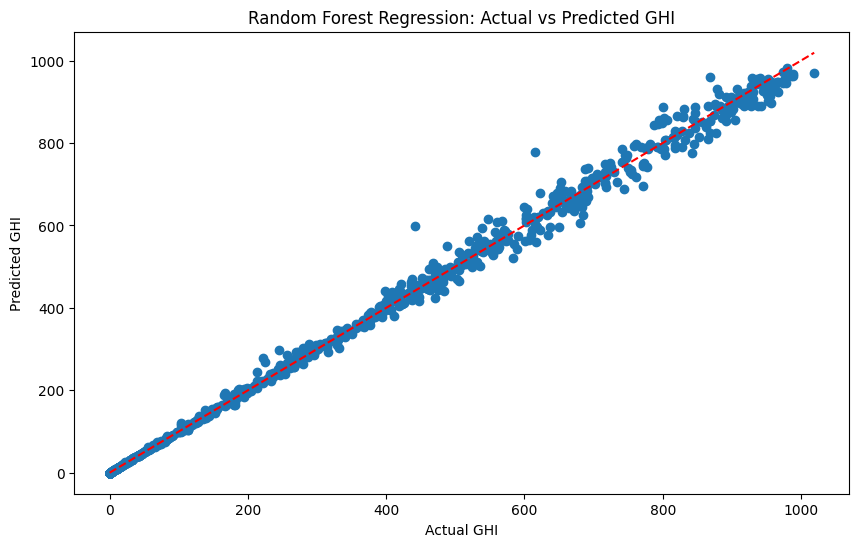

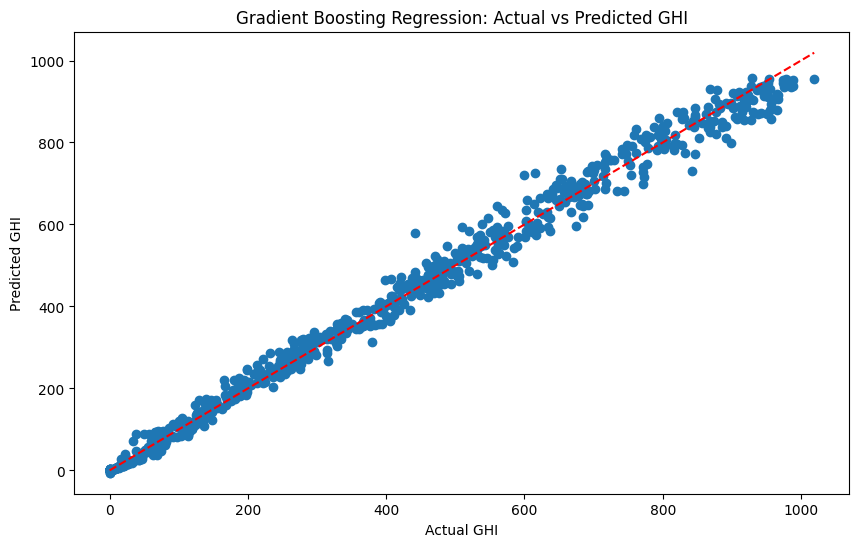

In [ ]:
import matplotlib.pyplot as plt

# Plotting the actual values and predictions for Random Forest Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual GHI')
plt.ylabel('Predicted GHI')
plt.title('Random Forest Regression: Actual vs Predicted GHI')
plt.show()

# Plotting the actual values and predictions for Gradient Boosting Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gbr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual GHI')
plt.ylabel('Predicted GHI')
plt.title('Gradient Boosting Regression: Actual vs Predicted GHI')
plt.show()


**Comparison of Evaluation Metrics for Different Models**

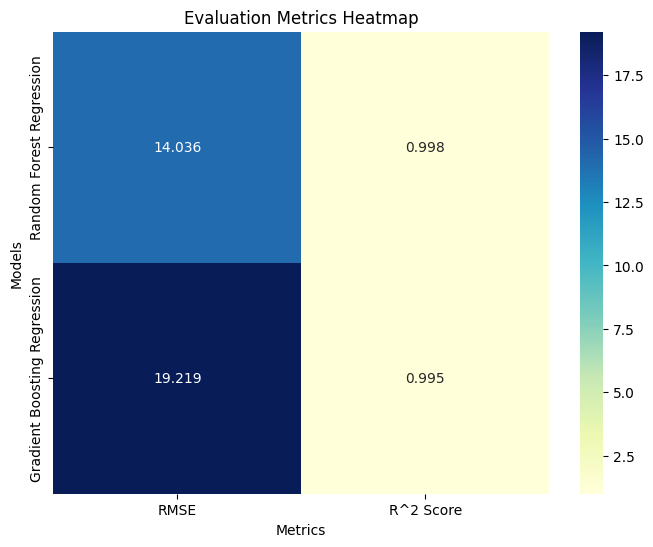

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Createing a list of model names and evaluation metrics
model_names = list(evaluation_matrix.keys())
metrics = list(evaluation_matrix[model_names[0]].keys())

# Createing a list of lists to store the metric values for each model
metric_values = []
for model in model_names:
    metric_values.append(list(evaluation_matrix[model].values()))

# Createing a DataFrame from the metric values
df_metrics = pd.DataFrame(metric_values, columns=metrics, index=model_names)

# Createing a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_metrics, annot=True, cmap="YlGnBu", fmt=".3f", cbar=True)
plt.title("Evaluation Metrics Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Models")
plt.show()


**Comparison of GBR and Random Forest Predictions**





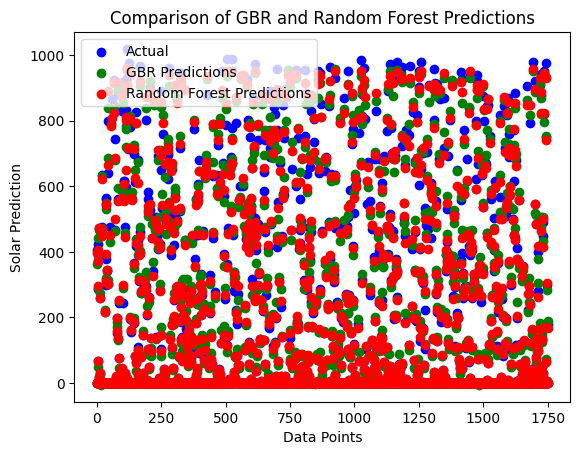

In [ ]:
import matplotlib.pyplot as plt

# Plotting the actual values
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')

# Plotting the predictions from GBR
plt.scatter(range(len(y_test)), y_pred_gbr, color='green', label='GBR Predictions')

# Plotting the predictions from Random Forest
plt.scatter(range(len(y_test)), y_pred_rf, color='red', label='Random Forest Predictions')

plt.xlabel('Data Points')
plt.ylabel('Solar Prediction')
plt.title('Comparison of GBR and Random Forest Predictions')
plt.legend()
plt.show()
